## EDA danych dotyczących Titanica

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000    0.0    0.0   24160  211.3375       B5        S    2   
1       male   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11   
2     female   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1305  female      NaN    1.0    0.0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000    0.0    0.0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000    0.0    0.0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000    0.0    0.0  315082    7.8750      NaN        S  NaN   
1309     NaN      NaN    NaN    NaN     NaN       NaN      NaN      NaN  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  
1309    NaN                              NaN  

[1310 rows x 14 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
df.sample(10)

pclass  survived                                           name     sex  \
1121     3.0       1.0                       Peter, Master. Michael J    male   
264      1.0       1.0            Simonius-Blumer, Col. Oberst Alfons    male   
1029     3.0       0.0                            Moran, Mr. Daniel J    male   
410      2.0       0.0               Frost, Mr. Anthony Wood "Archie"    male   
1226     3.0       0.0                           Stoytcheff, Mr. Ilia    male   
139      1.0       1.0  Graham, Mrs. William Thompson (Edith Junkins)  female   
218      1.0       1.0                   Oliva y Ocana, Dona. Fermina  female   
418      2.0       0.0                           Gilbert, Mr. William    male   
1291     3.0       0.0               Willer, Mr. Aaron ("Abi Weller")    male   
1189     3.0       1.0                Sandstrom, Miss. Marguerite Rut  female   

       age  sibsp  parch      ticket      fare cabin embarked boat  body  \
1121   NaN    1.0    1.0        2668   22.3583   NaN        C    C   NaN   
264   56.0    0.0    0.0       13213   35.5000   A26        C    3   NaN   
1029   NaN    1.0    0.0      371110   24.1500   NaN        Q  NaN   NaN   
410    NaN    0.0    0.0      239854    0.0000   NaN        S  NaN   NaN   
1226  19.0    0.0    0.0      349205    7.8958   NaN        S  NaN   NaN   
139   58.0    0.0    1.0    PC 17582  153.4625  C125        S    3   NaN   
218   39.0    0.0    0.0    PC 17758  108.9000  C105        C    8   NaN   
418   47.0    0.0    0.0  C.A. 30769   10.5000   NaN        S  NaN   NaN   
1291   NaN    0.0    0.0        3410    8.7125   NaN        S  NaN   NaN   
1189   4.0    1.0    1.0     PP 9549   16.7000    G6        S   13   NaN   

               home.dest  
1121                 NaN  
264   Basel, Switzerland  
1029                 NaN  
410              Belfast  
1226                 NaN  
139        Greenwich, CT  
218                  NaN  
418             Cornwall  
1291                 NaN  
1189                 NaN

In [6]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [7]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [10]:
duplicates = df[df.duplicated()]
duplicates

Empty DataFrame
Columns: [pclass, survived, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest]
Index: []

In [16]:
df['home.dest'].unique()

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
       'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
       'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
       'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
       'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
       'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
       'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
       'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
       'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
       'Denver, CO', 'Belmont, MA', 'Washington, DC',
       'Austria-Hungary / Germantown, Philadelphia, PA',
       'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
       'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
       'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
       'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
       'Lakewood, NJ', 'Roachdale, I

In [19]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

#### Najczęściej brakuje informacji o numerze kabiny, numerze ciała i łodzi ratunkowej.

In [20]:
df["sex"].value_counts()

male      843
female    466
Name: sex, dtype: int64

#### Na statku było dwa razy więcej mężczyzn.

In [7]:
df['sex'].replace(['female', 'male'], [0, 1], inplace=True)

In [24]:
df.sample(10)

pclass  survived                                               name  \
990      3.0       0.0                          Makinen, Mr. Kalle Edvard   
362      2.0       1.0                         Cameron, Miss. Clear Annie   
1239     3.0       0.0                       Theobald, Mr. Thomas Leonard   
966      3.0       0.0              Lindahl, Miss. Agda Thorilda Viktoria   
74       1.0       0.0                        Clifford, Mr. George Quincy   
142      1.0       0.0                           Guggenheim, Mr. Benjamin   
460      2.0       1.0  Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...   
377      2.0       1.0                   Collyer, Miss. Marjorie "Lottie"   
855      3.0       0.0                           Hassan, Mr. Houssein G N   
511      2.0       0.0                          Myles, Mr. Thomas Francis   

      sex   age  sibsp  parch             ticket     fare    cabin embarked  \
990   1.0  29.0    0.0    0.0  STON/O 2. 3101268   7.9250      NaN        S   
362   0.0  35.0    0.0    0.0       F.C.C. 13528  21.0000      NaN        S   
1239  1.0  34.0    0.0    0.0             363294   8.0500      NaN        S   
966   0.0  25.0    0.0    0.0             347071   7.7750      NaN        S   
74    1.0   NaN    0.0    0.0             110465  52.0000      A14        S   
142   1.0  46.0    0.0    0.0           PC 17593  79.2000  B82 B84        C   
460   0.0  24.0    2.0    1.0             243847  27.0000      NaN        S   
377   0.0   8.0    0.0    2.0         C.A. 31921  26.2500      NaN        S   
855   1.0  11.0    0.0    0.0               2699  18.7875      NaN        C   
511   1.0  62.0    0.0    0.0             240276   9.6875      NaN        Q   

     boat   body                                home.dest  
990   NaN    NaN                                      NaN  
362    14    NaN                           Mamaroneck, NY  
1239  NaN  176.0                                      NaN  
966   NaN    NaN                                      NaN  
74    NaN    NaN                            Stoughton, MA  
142   NaN    NaN                             New York, NY  
460    12    NaN                                   London  
377    14    NaN  Bishopstoke, Hants / Fayette Valley, ID  
855   NaN    NaN                                      NaN  
511   NaN    NaN                            Cambridge, MA

In [25]:
df.mean(numeric_only=True)

pclass        2.294882
survived      0.381971
sex           0.644003
age          29.881135
sibsp         0.498854
parch         0.385027
fare         33.295479
body        160.809917
dtype: float64

In [5]:
df.groupby("survived").describe().transpose()

survived             0.0         1.0
pclass count  809.000000  500.000000
       mean     2.500618    1.962000
       std      0.744825    0.872972
       min      1.000000    1.000000
       25%      2.000000    1.000000
       50%      3.000000    2.000000
       75%      3.000000    3.000000
       max      3.000000    3.000000
age    count  619.000000  427.000000
       mean    30.545369   28.918228
       std     13.922539   15.061481
       min      0.333300    0.166700
       25%     21.000000   20.000000
       50%     28.000000   28.000000
       75%     39.000000   38.000000
       max     74.000000   80.000000
sibsp  count  809.000000  500.000000
       mean     0.521632    0.462000
       std      1.210449    0.685197
       min      0.000000    0.000000
       25%      0.000000    0.000000
       50%      0.000000    0.000000
       75%      1.000000    1.000000
       max      8.000000    4.000000
parch  count  809.000000  500.000000
       mean     0.328801    0.476000
       std      0.912332    0.776292
       min      0.000000    0.000000
       25%      0.000000    0.000000
       50%      0.000000    0.000000
       75%      0.000000    1.000000
       max      9.000000    5.000000
fare   count  808.000000  500.000000
       mean    23.353831   49.361184
       std     34.145096   68.648795
       min      0.000000    0.000000
       25%      7.854200   11.214600
       50%     10.500000   26.000000
       75%     26.000000   57.750000
       max    263.000000  512.329200
body   count  121.000000    0.000000
       mean   160.809917         NaN
       std     97.696922         NaN
       min      1.000000         NaN
       25%     72.000000         NaN
       50%    155.000000         NaN
       75%    256.000000         NaN
       max    328.000000         NaN

#### Mediana dla wieku to 29.8. Najmłodszy pasażer nie miał roku, a najstarszy miał 80 lat. Czy oni przeżyli?

In [6]:
df[(df['age'] == 80) & (df['survived'] == 1)].count()

pclass       1
survived     1
name         1
sex          1
age          1
sibsp        1
parch        1
ticket       1
fare         1
cabin        1
embarked     1
boat         1
body         0
home.dest    1
dtype: int64

#### Najstarszy pasażer przeżył.

In [3]:
df[(df['age'] < 1)].count()

pclass       12
survived     12
name         12
sex          12
age          12
sibsp        12
parch        12
ticket       12
fare         12
cabin         1
embarked     12
boat         10
body          0
home.dest    10
dtype: int64

#### Płynęło 12 niemowlaków.

In [96]:
df[(df['age'] < 1) & (df['survived'] == 1)].count()

pclass       10
survived     10
name         10
sex          10
age          10
sibsp        10
parch        10
ticket       10
fare         10
cabin         1
embarked     10
boat         10
body          0
home.dest     9
dtype: int64

In [98]:
df[(df['age'] < 1) & (df['survived'] == 0)].count()

pclass       2
survived     2
name         2
sex          2
age          2
sibsp        2
parch        2
ticket       2
fare         2
cabin        0
embarked     2
boat         0
body         0
home.dest    1
dtype: int64

#### 2 niemowlaków zginęło.

In [13]:
df[(df['age'] < 1) & (df['survived'] == 0)].mode()

pclass  survived                                     name   sex     age  \
0     3.0       0.0  Danbom, Master. Gilbert Sigvard Emanuel  male  0.3333   
1     NaN       NaN           Peacock, Master. Alfred Edward   NaN  0.7500   

   sibsp  parch              ticket    fare cabin embarked boat  body  \
0    0.0    1.0              347080  13.775   NaN        S  NaN   NaN   
1    1.0    2.0  SOTON/O.Q. 3101315  14.400   NaN      NaN  NaN   NaN   

     home.dest  
0  Stanton, IA  
1          NaN

#### Niemowlaki nie były spokrewnione.

In [21]:
df["ticket"].value_counts()

CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
373450       1
2223         1
350046       1
3101281      1
315082       1
Name: ticket, Length: 929, dtype: int64

In [34]:
df["home.dest"].value_counts()

New York, NY                                    64
London                                          14
Montreal, PQ                                    10
Paris, France                                    9
Cornwall / Akron, OH                             9
                                                ..
Chelsea, London                                  1
Harrow-on-the-Hill, Middlesex                    1
Copenhagen, Denmark                              1
Guernsey / Montclair, NJ and/or Toledo, Ohio     1
Antwerp, Belgium / Stanton, OH                   1
Name: home.dest, Length: 369, dtype: int64

#### Najczęściej płynęłi do Nowego Jorku.

In [22]:
df["name"].value_counts()

Connolly, Miss. Kate             2
Kelly, Mr. James                 2
Allen, Miss. Elisabeth Walton    1
Ilmakangas, Miss. Ida Livija     1
Ilieff, Mr. Ylio                 1
                                ..
Hart, Miss. Eva Miriam           1
Harris, Mr. Walter               1
Harris, Mr. George               1
Harper, Rev. John                1
Zimmerman, Mr. Leo               1
Name: name, Length: 1307, dtype: int64

In [27]:
df["name"].value_counts().duplicated()

Connolly, Miss. Kate             False
Kelly, Mr. James                  True
Allen, Miss. Elisabeth Walton    False
Ilmakangas, Miss. Ida Livija      True
Ilieff, Mr. Ylio                  True
                                 ...  
Hart, Miss. Eva Miriam            True
Harris, Mr. Walter                True
Harris, Mr. George                True
Harper, Rev. John                 True
Zimmerman, Mr. Leo                True
Name: name, Length: 1307, dtype: bool

In [26]:
df.duplicated(subset='name', keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
1305    False
1306    False
1307    False
1308    False
1309    False
Length: 1310, dtype: bool

#### Mamy dwie pary osób o takim samym imieniu i nazwisku, bo wiersze nie są zdublowane.

In [30]:
df["survived"].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

#### Przeżyło 500 osób.

In [31]:
df["pclass"].value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

#### Najwięcej osób płynęło w klasie 3.

In [33]:
df.groupby("pclass", as_index=False)["survived"].value_counts()

pclass  survived  count
0     1.0       1.0    200
1     1.0       0.0    123
2     2.0       0.0    158
3     2.0       1.0    119
4     3.0       0.0    528
5     3.0       1.0    181

#### Zestawienie osób, które przeżyły, a które nie przeżyły w każdej klasie. Najwięcej osób, które utonęły, płynęło w klasie 3.

In [17]:
df.groupby("survived", as_index=False)["age"].value_counts()

survived      age  count
0         0.0  21.0000     30
1         0.0  30.0000     25
2         0.0  24.0000     25
3         0.0  18.0000     25
4         0.0  28.0000     24
..        ...      ...    ...
154       1.0   0.1667      1
155       1.0   0.4167      1
156       1.0   0.6667      1
157       1.0  11.0000      1
158       1.0  80.0000      1

[159 rows x 3 columns]

#### Najwięcej pasażerów-ofiar miało 21 lat.

In [24]:
df.groupby("survived", as_index=False)["age"].value_counts()

survived      age  count
0         0.0  21.0000     30
1         0.0  30.0000     25
2         0.0  24.0000     25
3         0.0  18.0000     25
4         0.0  28.0000     24
..        ...      ...    ...
154       1.0   0.1667      1
155       1.0   0.4167      1
156       1.0   0.6667      1
157       1.0  11.0000      1
158       1.0  80.0000      1

[159 rows x 3 columns]

In [108]:
df["age"].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: age, Length: 98, dtype: int64

#### Najwięcej osób miało 24 lata

In [110]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

#### Najczęściej wchodzili portem Southampton, najrzadziej Queenstown.

In [22]:
df.groupby("embarked", as_index=False)["survived"].value_counts()

embarked  survived  count
0        C       1.0    150
1        C       0.0    120
2        Q       0.0     79
3        Q       1.0     44
4        S       0.0    610
5        S       1.0    304

In [23]:
df.groupby("sibsp", as_index=False)["survived"].value_counts()

sibsp  survived  count
0     0.0       0.0    582
1     0.0       1.0    309
2     1.0       1.0    163
3     1.0       0.0    156
4     2.0       0.0     23
5     2.0       1.0     19
6     3.0       0.0     14
7     3.0       1.0      6
8     4.0       0.0     19
9     4.0       1.0      3
10    5.0       0.0      6
11    8.0       0.0      9

In [24]:
df.groupby("parch", as_index=False)["survived"].value_counts()

parch  survived  count
0     0.0       0.0    666
1     0.0       1.0    336
2     1.0       1.0    100
3     1.0       0.0     70
4     2.0       1.0     57
5     2.0       0.0     56
6     3.0       1.0      5
7     3.0       0.0      3
8     4.0       0.0      5
9     4.0       1.0      1
10    5.0       0.0      5
11    5.0       1.0      1
12    6.0       0.0      2
13    9.0       0.0      2

In [56]:
df["parch"].value_counts()

0.0    1002
1.0     170
2.0     113
3.0       8
4.0       6
5.0       6
6.0       2
9.0       2
Name: parch, dtype: int64

### Najwięcej osób podróżowało samotnie, z jedną osobą podróżowało 170 osób, a z dwiema 113 osób.

In [4]:
df.corr(numeric_only=True)

pclass  survived       sex       age     sibsp     parch  \
pclass    1.000000 -0.312469  0.124617 -0.408106  0.060832  0.018322   
survived -0.312469  1.000000 -0.528693 -0.055513 -0.027825  0.082660   
sex       0.124617 -0.528693  1.000000  0.063646 -0.109609 -0.213125   
age      -0.408106 -0.055513  0.063646  1.000000 -0.243699 -0.150917   
sibsp     0.060832 -0.027825 -0.109609 -0.243699  1.000000  0.373587   
parch     0.018322  0.082660 -0.213125 -0.150917  0.373587  1.000000   
fare     -0.558629  0.244265 -0.185523  0.178739  0.160238  0.221539   
body     -0.034642       NaN -0.015903  0.058809 -0.099961  0.051099   

              fare      body  
pclass   -0.558629 -0.034642  
survived  0.244265       NaN  
sex      -0.185523 -0.015903  
age       0.178739  0.058809  
sibsp     0.160238 -0.099961  
parch     0.221539  0.051099  
fare      1.000000 -0.043110  
body     -0.043110  1.000000

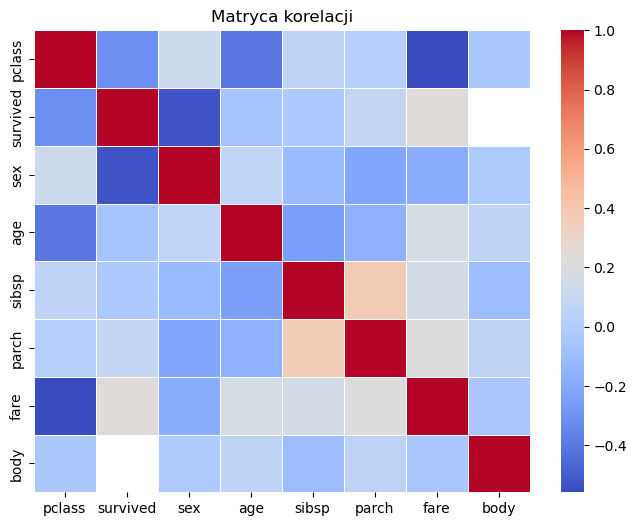

In [26]:
matryca_kor = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(matryca_kor, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matryca korelacji")
plt.show()

#### Płeć nie koreluje z przeżywalnością, ale widać małą korelację z klasą. Wiek - mała korelacja z ceną biletu. Największa korelacja między liczbą małżonków/rodzeństwa a rodziców/dzieci na pokładzie, zapewne były tak oznaczane rodziny.  

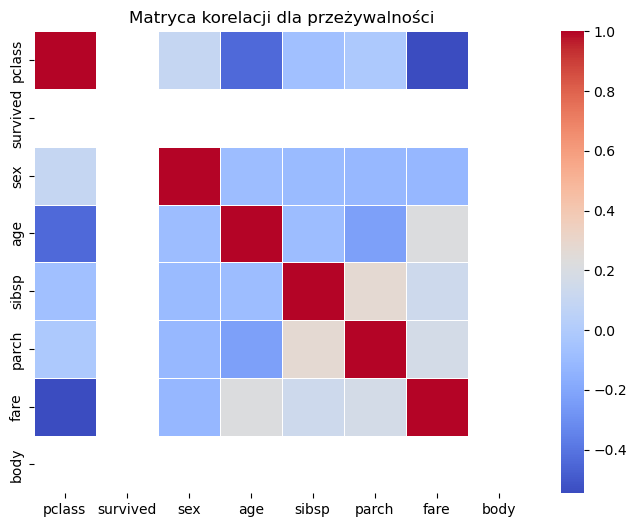

In [23]:
matryca_kor = df[df['survived'] == 1].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(matryca_kor, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matryca korelacji dla przeżywalności")
plt.show()

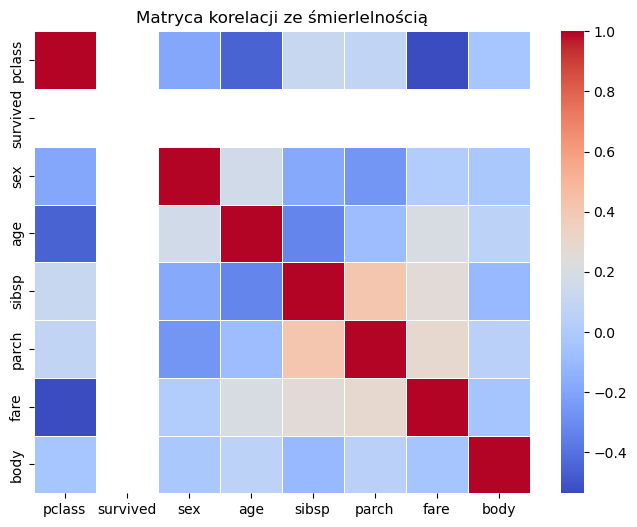

In [22]:
matryca_kor = df[df['survived'] == 0].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(matryca_kor, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matryca korelacji ze śmierlelnością")
plt.show()

#### Dla oznaczonych jako ofiary liczba dzieci korelauje z liczbą współmałżonków na pokładzie. Umierali razem?

In [59]:
df['body'].count()

121

#### 121 ciał wydobytych. Większości nie odnaleziono.

In [31]:
df["sex"].value_counts()

1.0    843
0.0    466
Name: sex, dtype: int64

In [30]:
df[(df['parch'] == 0) & (df["sibsp"] == 0) & (df['sex'] == 0)].count()

pclass       194
survived     194
name         194
sex          194
age          151
sibsp        194
parch        194
ticket       194
fare         194
cabin         46
embarked     192
boat         130
body           3
home.dest     93
dtype: int64

In [33]:
df[(df['sibsp'] == 0) & (df['sex'] == 0) & (df["parch"] == 0) & (df['survived'] == 0)].count()

pclass       52
survived     52
name         52
sex          52
age          38
sibsp        52
parch        52
ticket       52
fare         52
cabin         3
embarked     52
boat          0
body          3
home.dest    16
dtype: int64

#### 194 - tyle kobiet mogło płynąć statkiem samotnie, z czego 52 nie przeżyło.

In [34]:
df[(df['sibsp'] == 0) & (df['sex'] == 1) & (df["parch"] == 0)].count()

pclass       596
survived     596
name         596
sex          596
age          439
sibsp        596
parch        596
ticket       596
fare         595
cabin         85
embarked     596
boat          99
body          80
home.dest    287
dtype: int64

In [35]:
df[(df['sibsp'] == 0) & (df['sex'] == 1) & (df["parch"] == 0) & (df['survived'] == 0)].count()

pclass       499
survived     499
name         499
sex          499
age          364
sibsp        499
parch        499
ticket       499
fare         498
cabin         56
embarked     499
boat           4
body          80
home.dest    230
dtype: int64

#### Zdecydowana większość mężczyzn płynących samotnie nie przeżyła.

In [62]:
df[df["age"] < 18].count()

pclass       154
survived     154
name         154
sex          154
age          154
sibsp        154
parch        154
ticket       154
fare         154
cabin         23
embarked     154
boat          77
body           5
home.dest     89
dtype: int64

In [59]:
df[(df['age'] < 18) & (df['survived'] == 0)].count()

pclass       73
survived     73
name         73
sex          73
age          73
sibsp        73
parch        73
ticket       73
fare         73
cabin         2
embarked     73
boat          0
body          5
home.dest    30
dtype: int64

#### Było 154 niepełnoletnich osób, 73 nie przeżyło, w tym odnaleziono 5 ciał. 

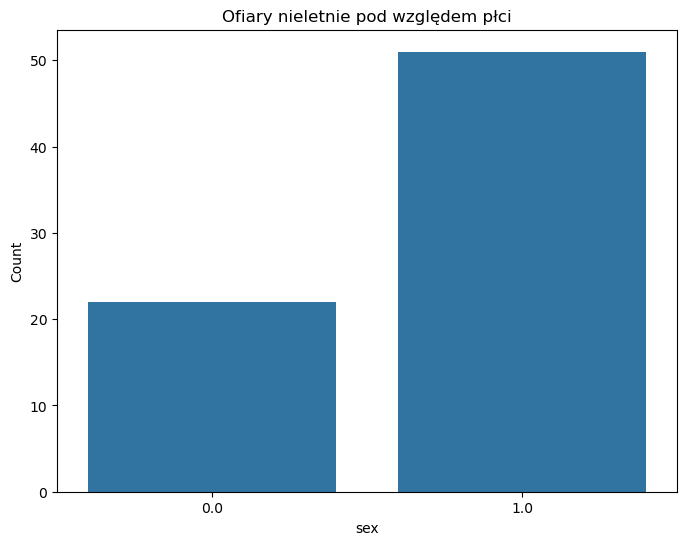

In [36]:
nieletni = df[(df["age"] < 18) & (df['survived'] == 0)]
plt.figure(figsize=(8, 6))
sns.countplot(data=nieletni, x='sex')
plt.title('Ofiary nieletnie pod względem płci')
plt.xlabel('sex')
plt.ylabel('Count')
plot_filename = "sex_survival_18.png"
plt.savefig(plot_filename)

#### Większość to chłopcy.

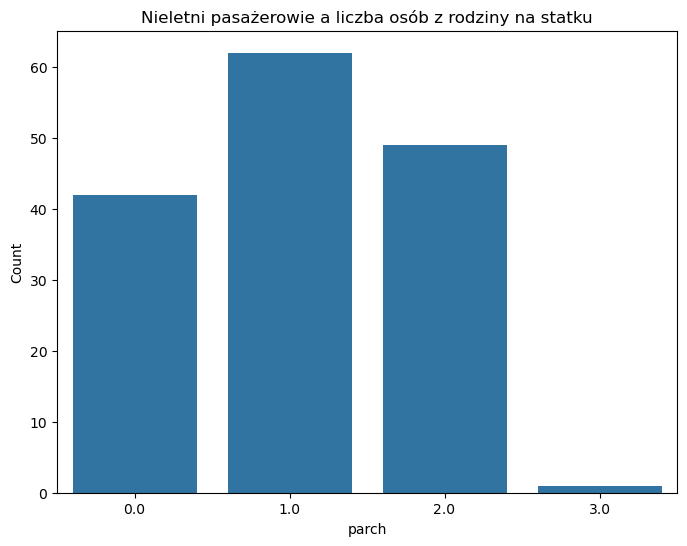

In [37]:
nieletni = df[(df["age"] < 18)]
plt.figure(figsize=(8, 6))
sns.countplot(data=nieletni, x='parch')
plt.title('Nieletni pasażerowie a liczba osób z rodziny na statku')
plt.xlabel('parch')
plt.ylabel('Count')
plot_filename = "sex_survivallll.png"
plt.savefig(plot_filename)

#### Najwięcej nieletnich płynęło z 1 rodzicem.

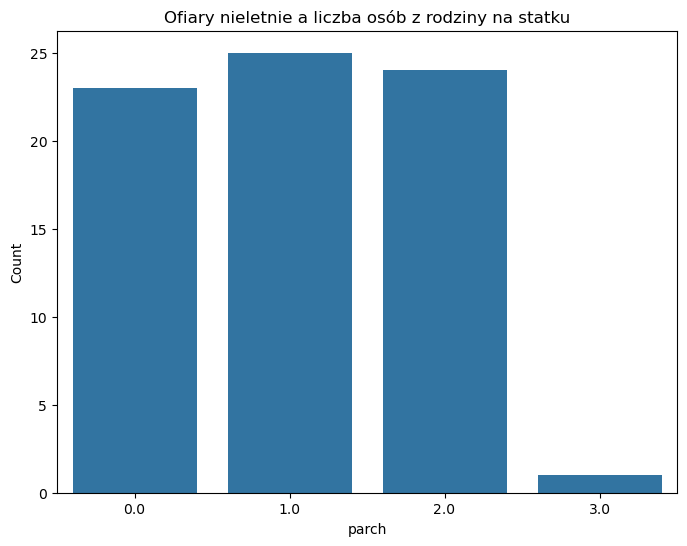

In [38]:
nieletni = df[(df["age"] < 18) & (df['survived'] == 0)]
plt.figure(figsize=(8, 6))
sns.countplot(data=nieletni, x='parch')
plt.title('Ofiary nieletnie a liczba osób z rodziny na statku')
plt.xlabel('parch')
plt.ylabel('Count')
plot_filename = "sex_survival_child.png"
plt.savefig(plot_filename)

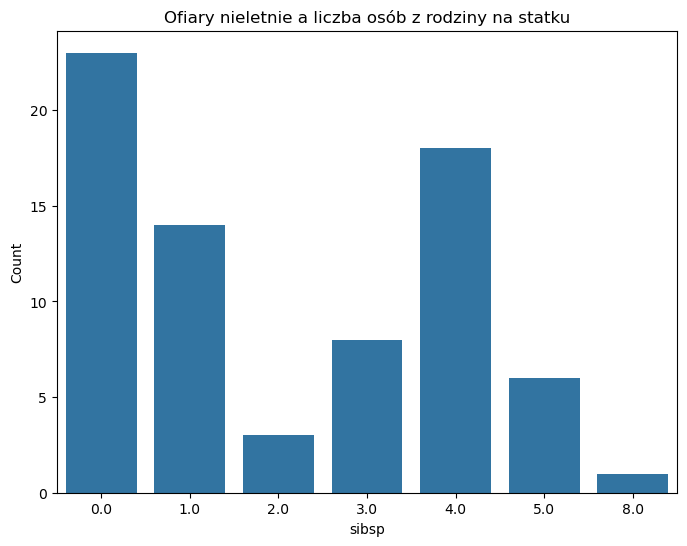

In [4]:
nieletni = df[(df["age"] < 18) & (df['survived'] == 0)]
plt.figure(figsize=(8, 6))
sns.countplot(data=nieletni, x='sibsp')
plt.title('Ofiary nieletnie a liczba osób z rodziny na statku')
plt.xlabel('sibsp')
plt.ylabel('Count')
plot_filename = "parch_not_survival_correlation.png"
plt.savefig(plot_filename)

#### Ci, którzy nie przeżyli, w większości byli jedynakami.

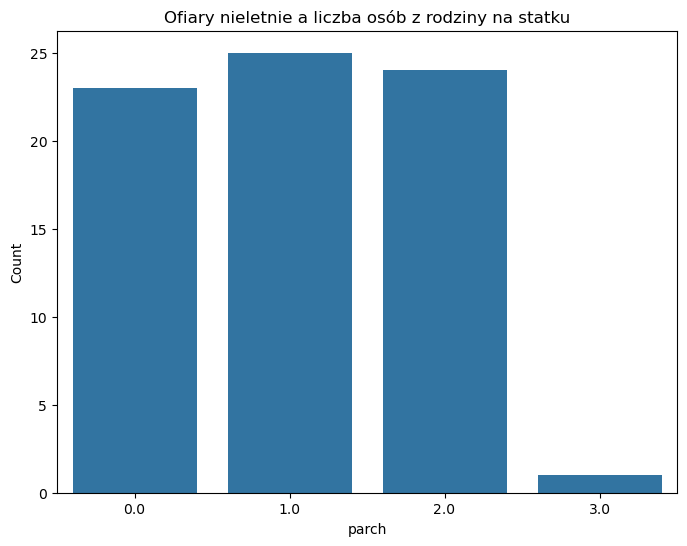

In [5]:
nieletni = df[(df["age"] < 18) & (df['survived'] == 0)]
plt.figure(figsize=(8, 6))
sns.countplot(data=nieletni, x='parch')
plt.title('Ofiary nieletnie a liczba osób z rodziny na statku')
plt.xlabel('parch')
plt.ylabel('Count')
plot_filename = "ofiary_nieletnie_rodzina.png"
plt.savefig(plot_filename)

#### Większość nieletnich płynęła z 1 rodzicem, ale było też sporo samotnych płynących.

#### Ponad 20 dzieci płynęło samotnie. 

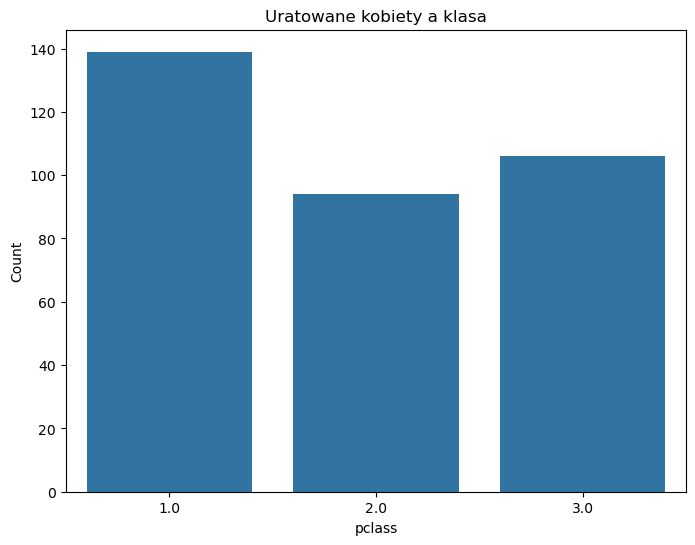

In [40]:
kobiety_uratowaneK = df[(df["sex"] == 0) & (df['survived'] == 1)]
plt.figure(figsize=(8, 6))
sns.countplot(data=kobiety_uratowaneK, x="pclass")
plt.title('Uratowane kobiety a klasa')
plt.xlabel('pclass')
plt.ylabel('Count')
plot_filename = "class_kobiety.png"
plt.savefig(plot_filename)

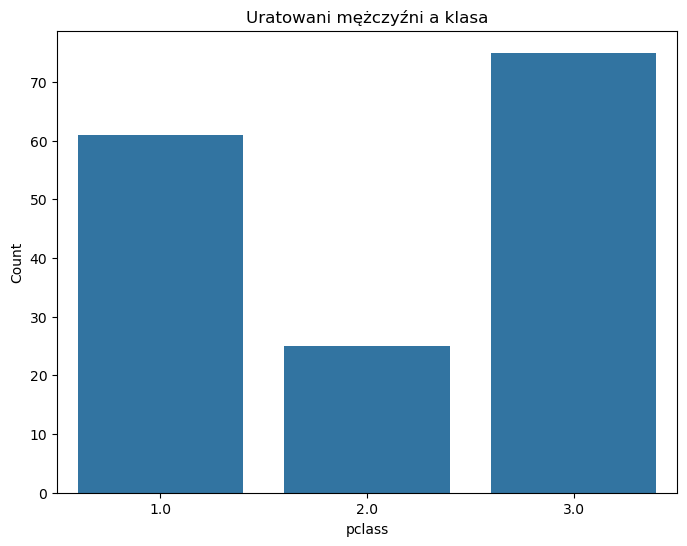

In [41]:
kobiety_uratowane_port = df[(df["sex"] == 1) & (df['survived'] == 1)]
plt.figure(figsize=(8, 6))
sns.countplot(data=kobiety_uratowane_port, x="pclass")
plt.title('Uratowani mężczyźni a klasa')
plt.xlabel('pclass')
plt.ylabel('Count')
plot_filename = "class_survival_male.png"
plt.savefig(plot_filename)

#### Większość uratowanych kobiet płynęła w klasie 1, a mężczyźni w klasie 3. 

#### Uratowane kobiety płynęły w większości klasą 1, a mężczyźni klasą 3.

In [42]:
df.groupby("sex", as_index=False)["pclass"].value_counts()

sex  pclass  count
0  0.0     3.0    216
1  0.0     1.0    144
2  0.0     2.0    106
3  1.0     3.0    493
4  1.0     1.0    179
5  1.0     2.0    171

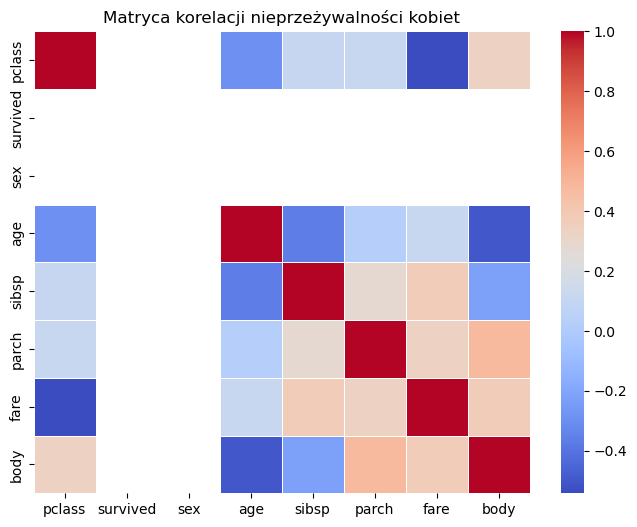

In [21]:
kobiety_martwe = df[(df["sex"] == 0) & (df['survived'] == 0)].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(kobiety_martwe, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matryca korelacji nieprzeżywalności kobiet")
plt.show()

#### Korelacja z ceną biletu i współprasażerami. Umierały z rodziną? Korelacja znalezionego ciała z klasą.

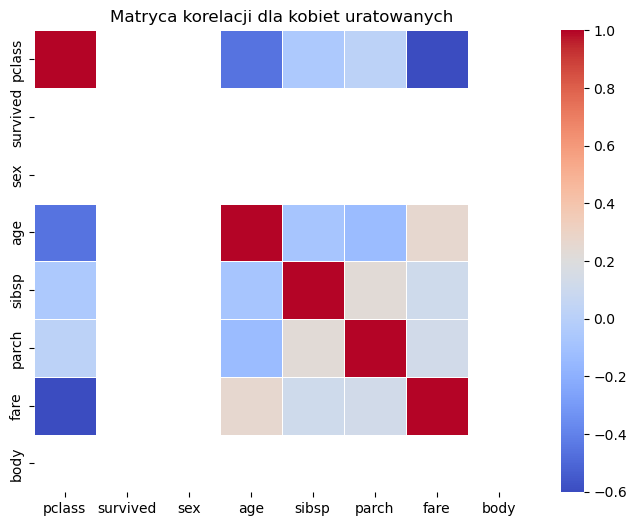

In [20]:
kobiety_uratowane = df[(df["sex"] == 0) & (df['survived'] == 1)].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(kobiety_uratowane, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matryca korelacji dla kobiet uratowanych")
plt.show()

#### Cena biletu koreluje z wiekiem.

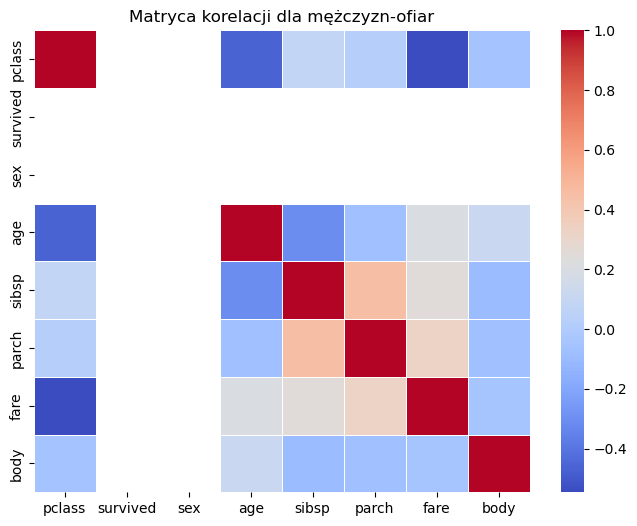

In [19]:
mezczyzni_martwi = df[(df["sex"] == 1) & (df['survived'] == 0)].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(mezczyzni_martwi, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matryca korelacji dla mężczyzn-ofiar")
plt.show()

#### U mężczyzn korelacja ze współprasażerami jest mniejszą, większość płynęła sama. Korelacja liczby rodzeństwa/małżonków z ceną. Być może przekłada się to na klasę, którą płynęli.

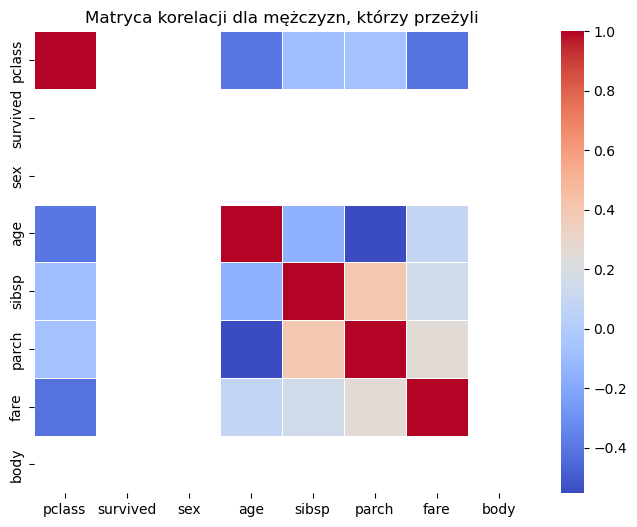

In [18]:
mezczyzni_uratowani = df[(df["sex"] == 1) & (df['survived'] == 1)].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(mezczyzni_uratowani, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matryca korelacji dla mężczyzn, którzy przeżyli")
plt.show()

#### Widać mniejszą korelację ceny biletu z liczbą rodzeństwa/małżonków. Być może przekłada się to na klasę, którą płynęli.

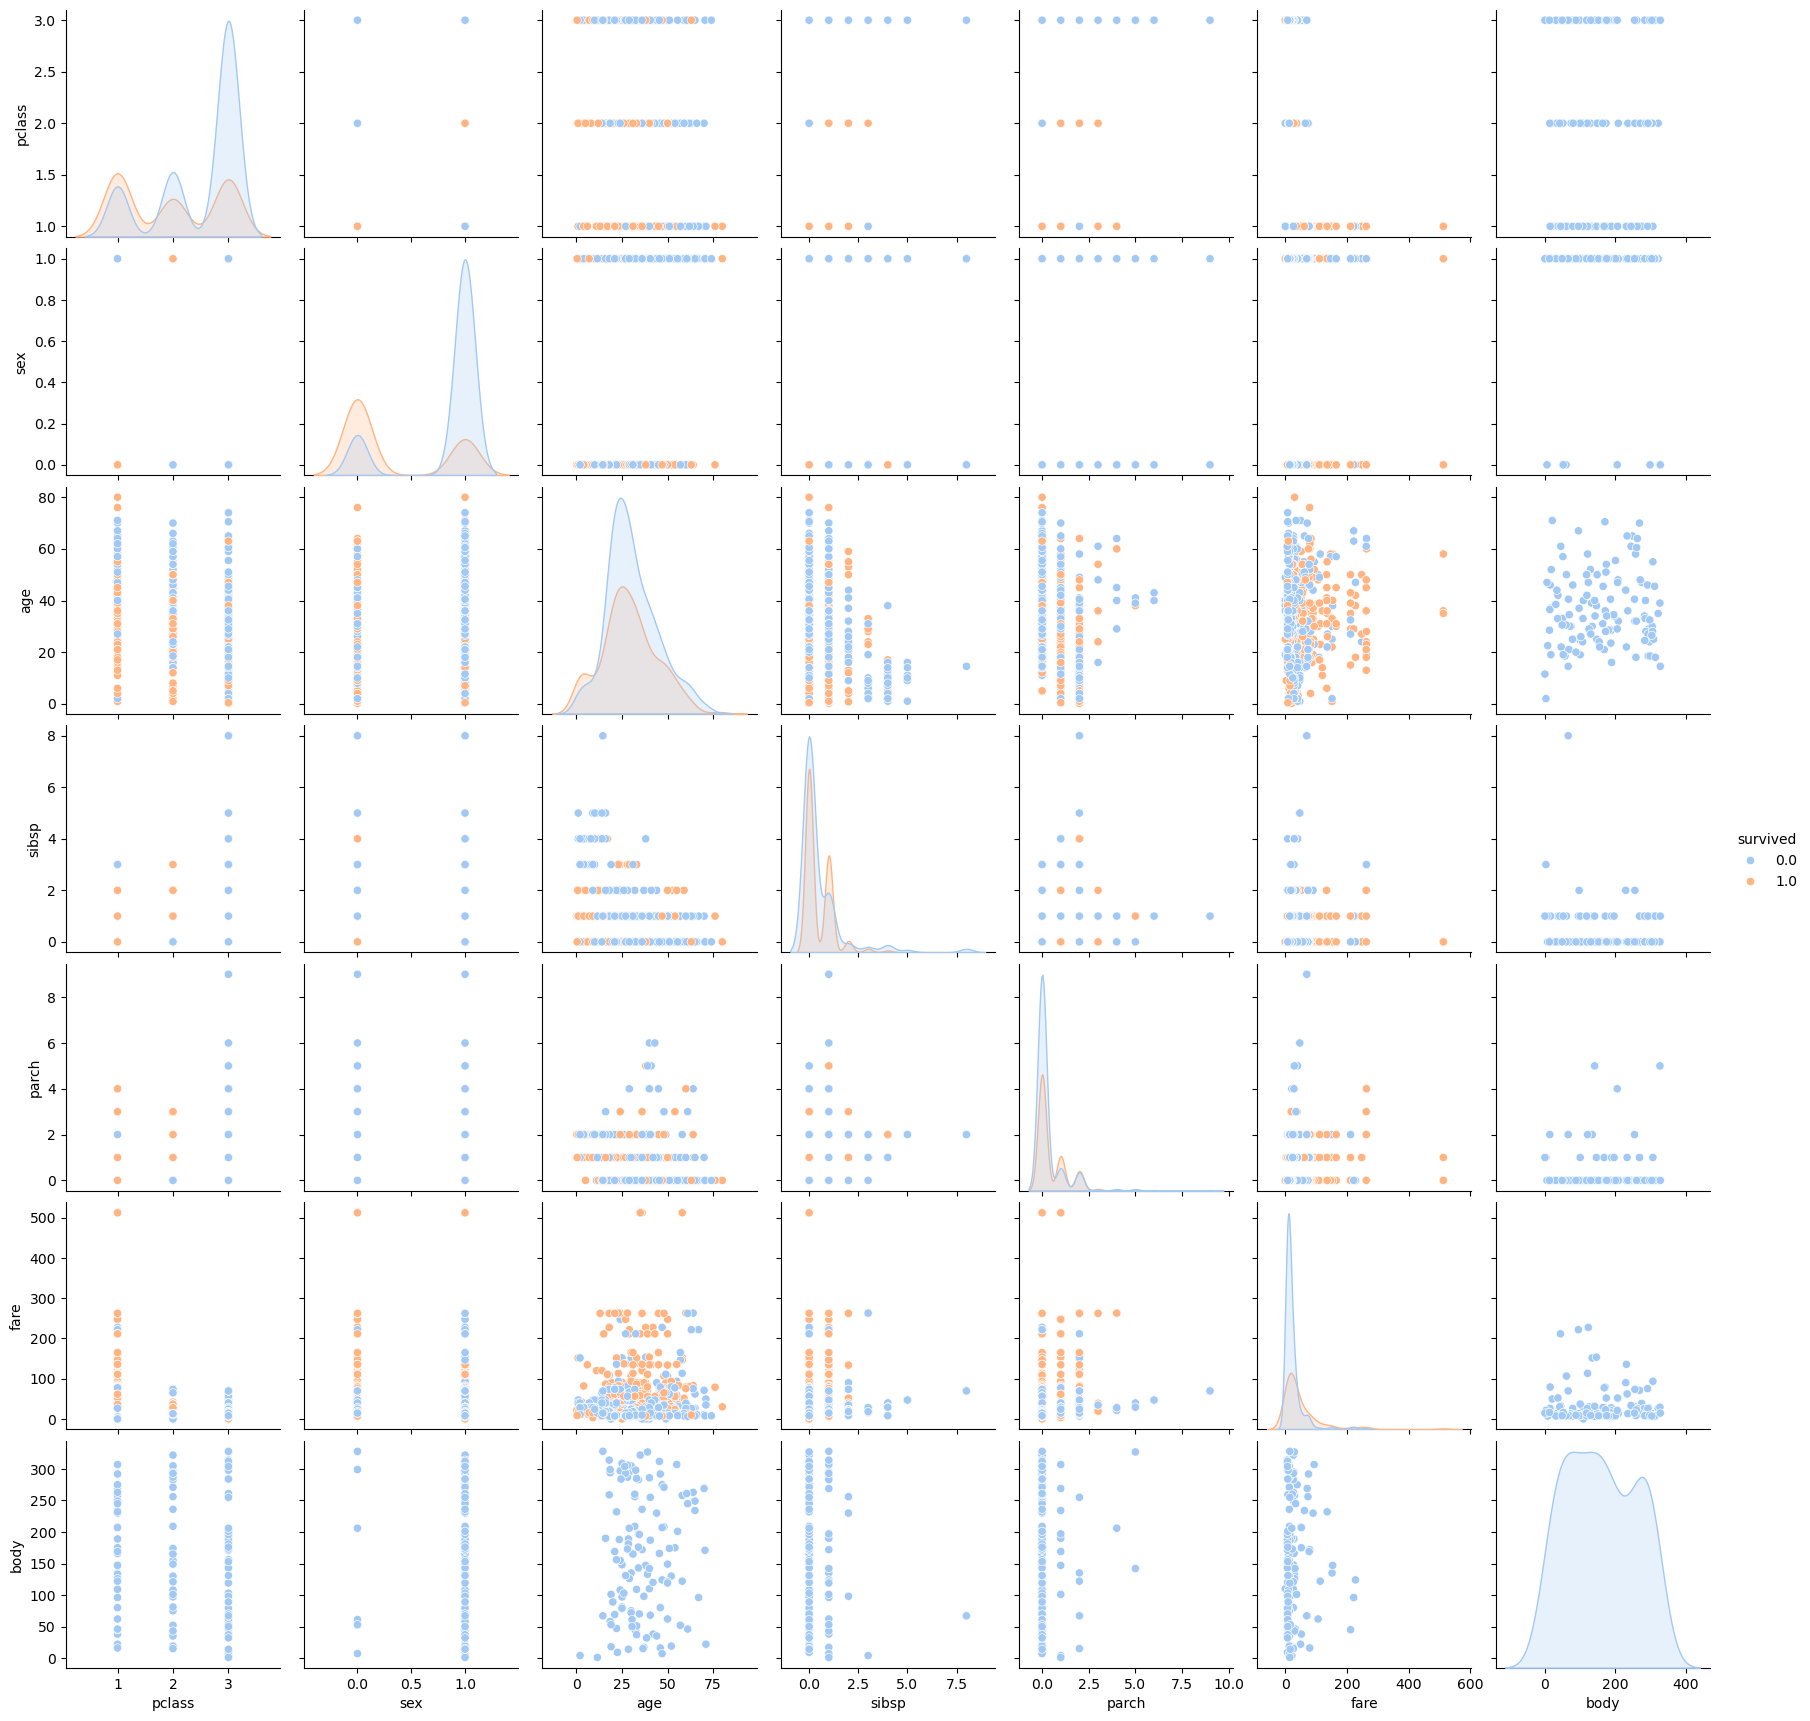

In [49]:
sns.pairplot(df, hue='survived', palette="pastel")

#### Przeżyło więcej pasażerów, którzy mieli droższy bilet, płynęli samotnie i płynęli w klasie 1.

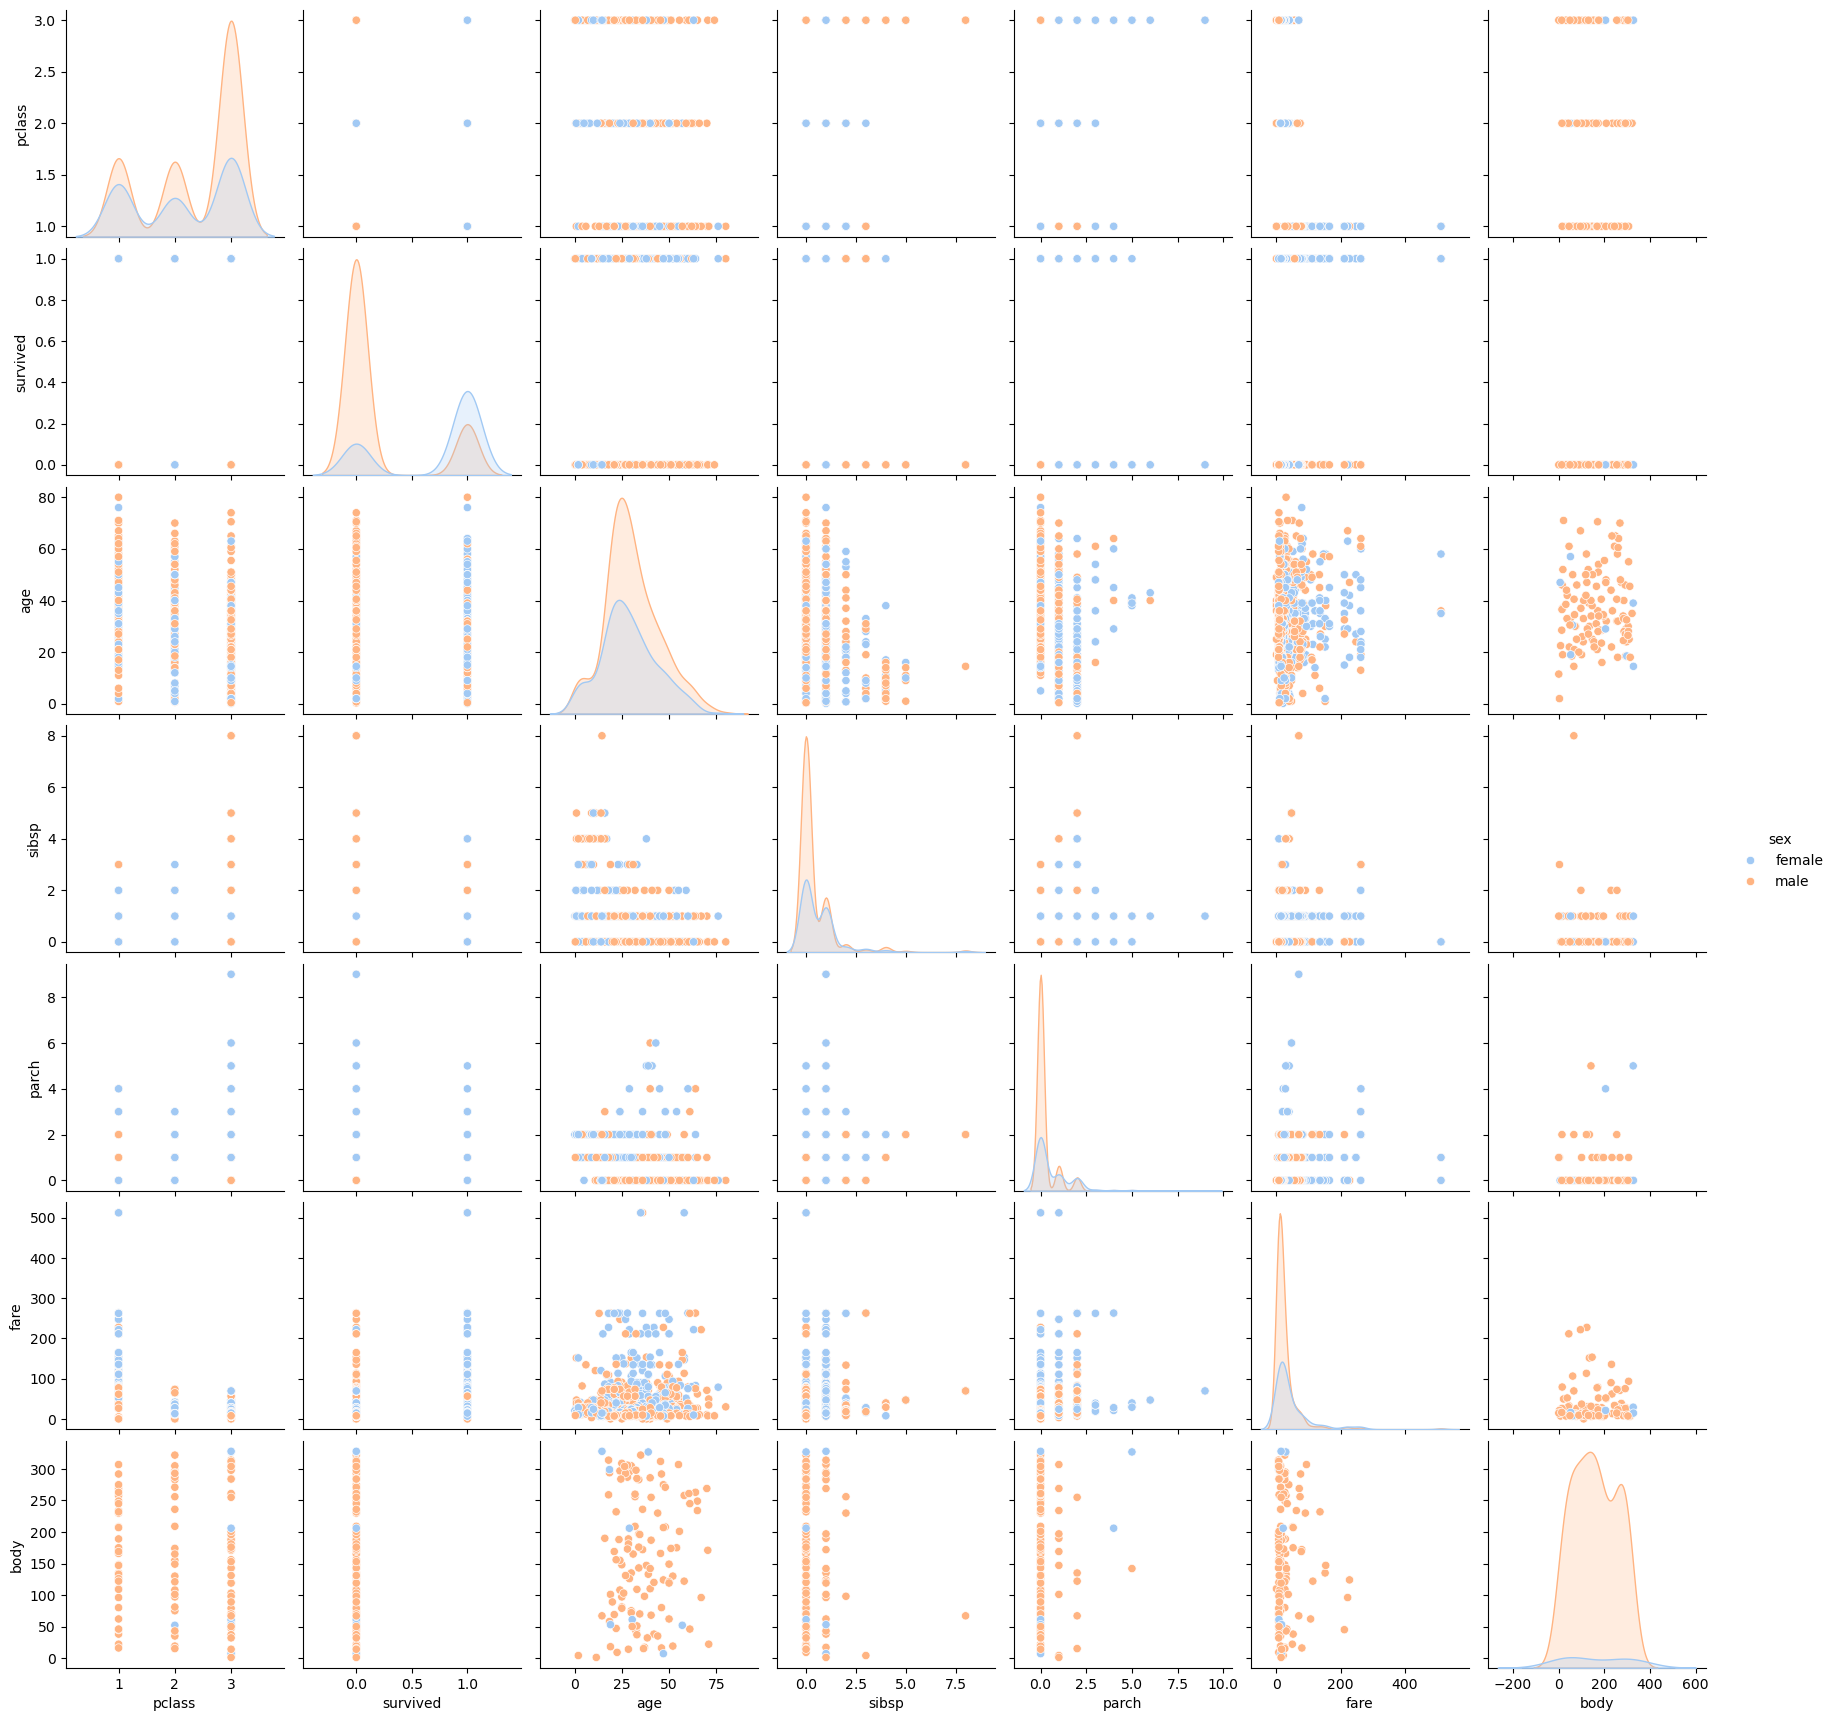

In [15]:
sns.pairplot(df, hue='sex', palette="pastel")

#### Znaczna przewaga ofiar wśród mężczyzn. Nie było kobiet powyżej 40 lat. W klasie 1 i 2 porównywalna liczba kobiet i mężczyzn, w klasie 3 znacznie więcej mężczyzn. Kobiety znacznie częściej płynęły z osobą towarzyszącą.

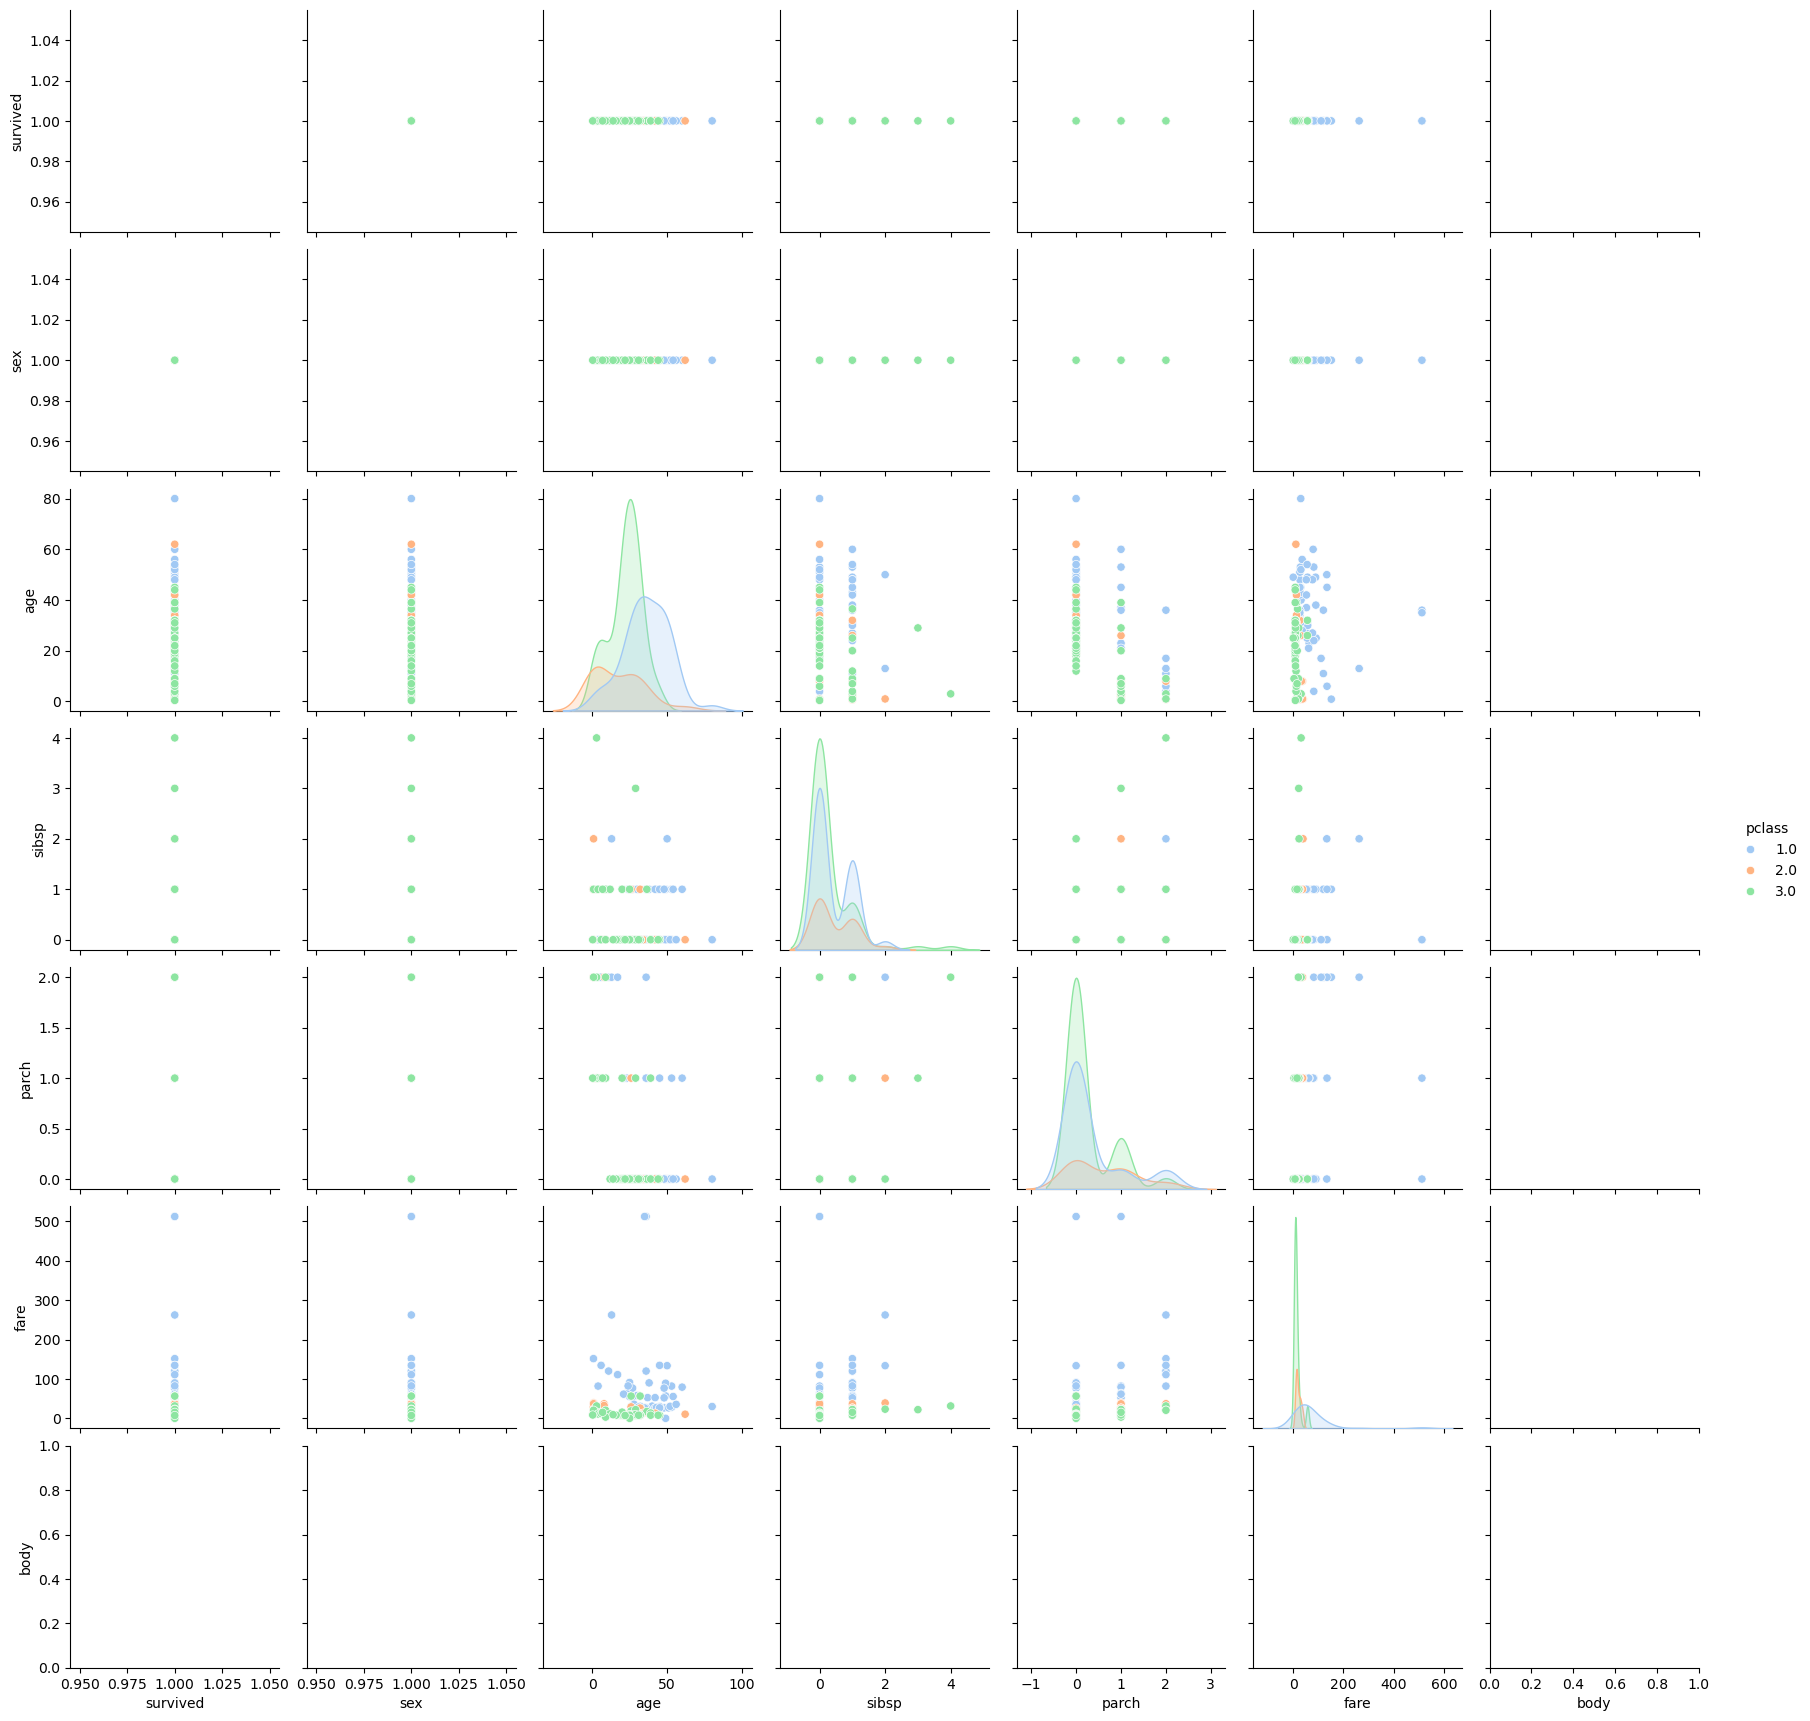

In [48]:
mezczyzni_uratowani_class = df[(df["sex"] == 1) & (df['survived'] == 1)]
sns.pairplot(mezczyzni_uratowani_class, hue='pclass', palette="pastel")

#### Uratowani mężczyźni często płynęli w klasie 1 i mieli do 40 lat.

#### Tańsze bilety wiązały się z klasą 3. Najmłodsi mężczyźni płynęli w klasie 2, a najstarszi w klasie 3.

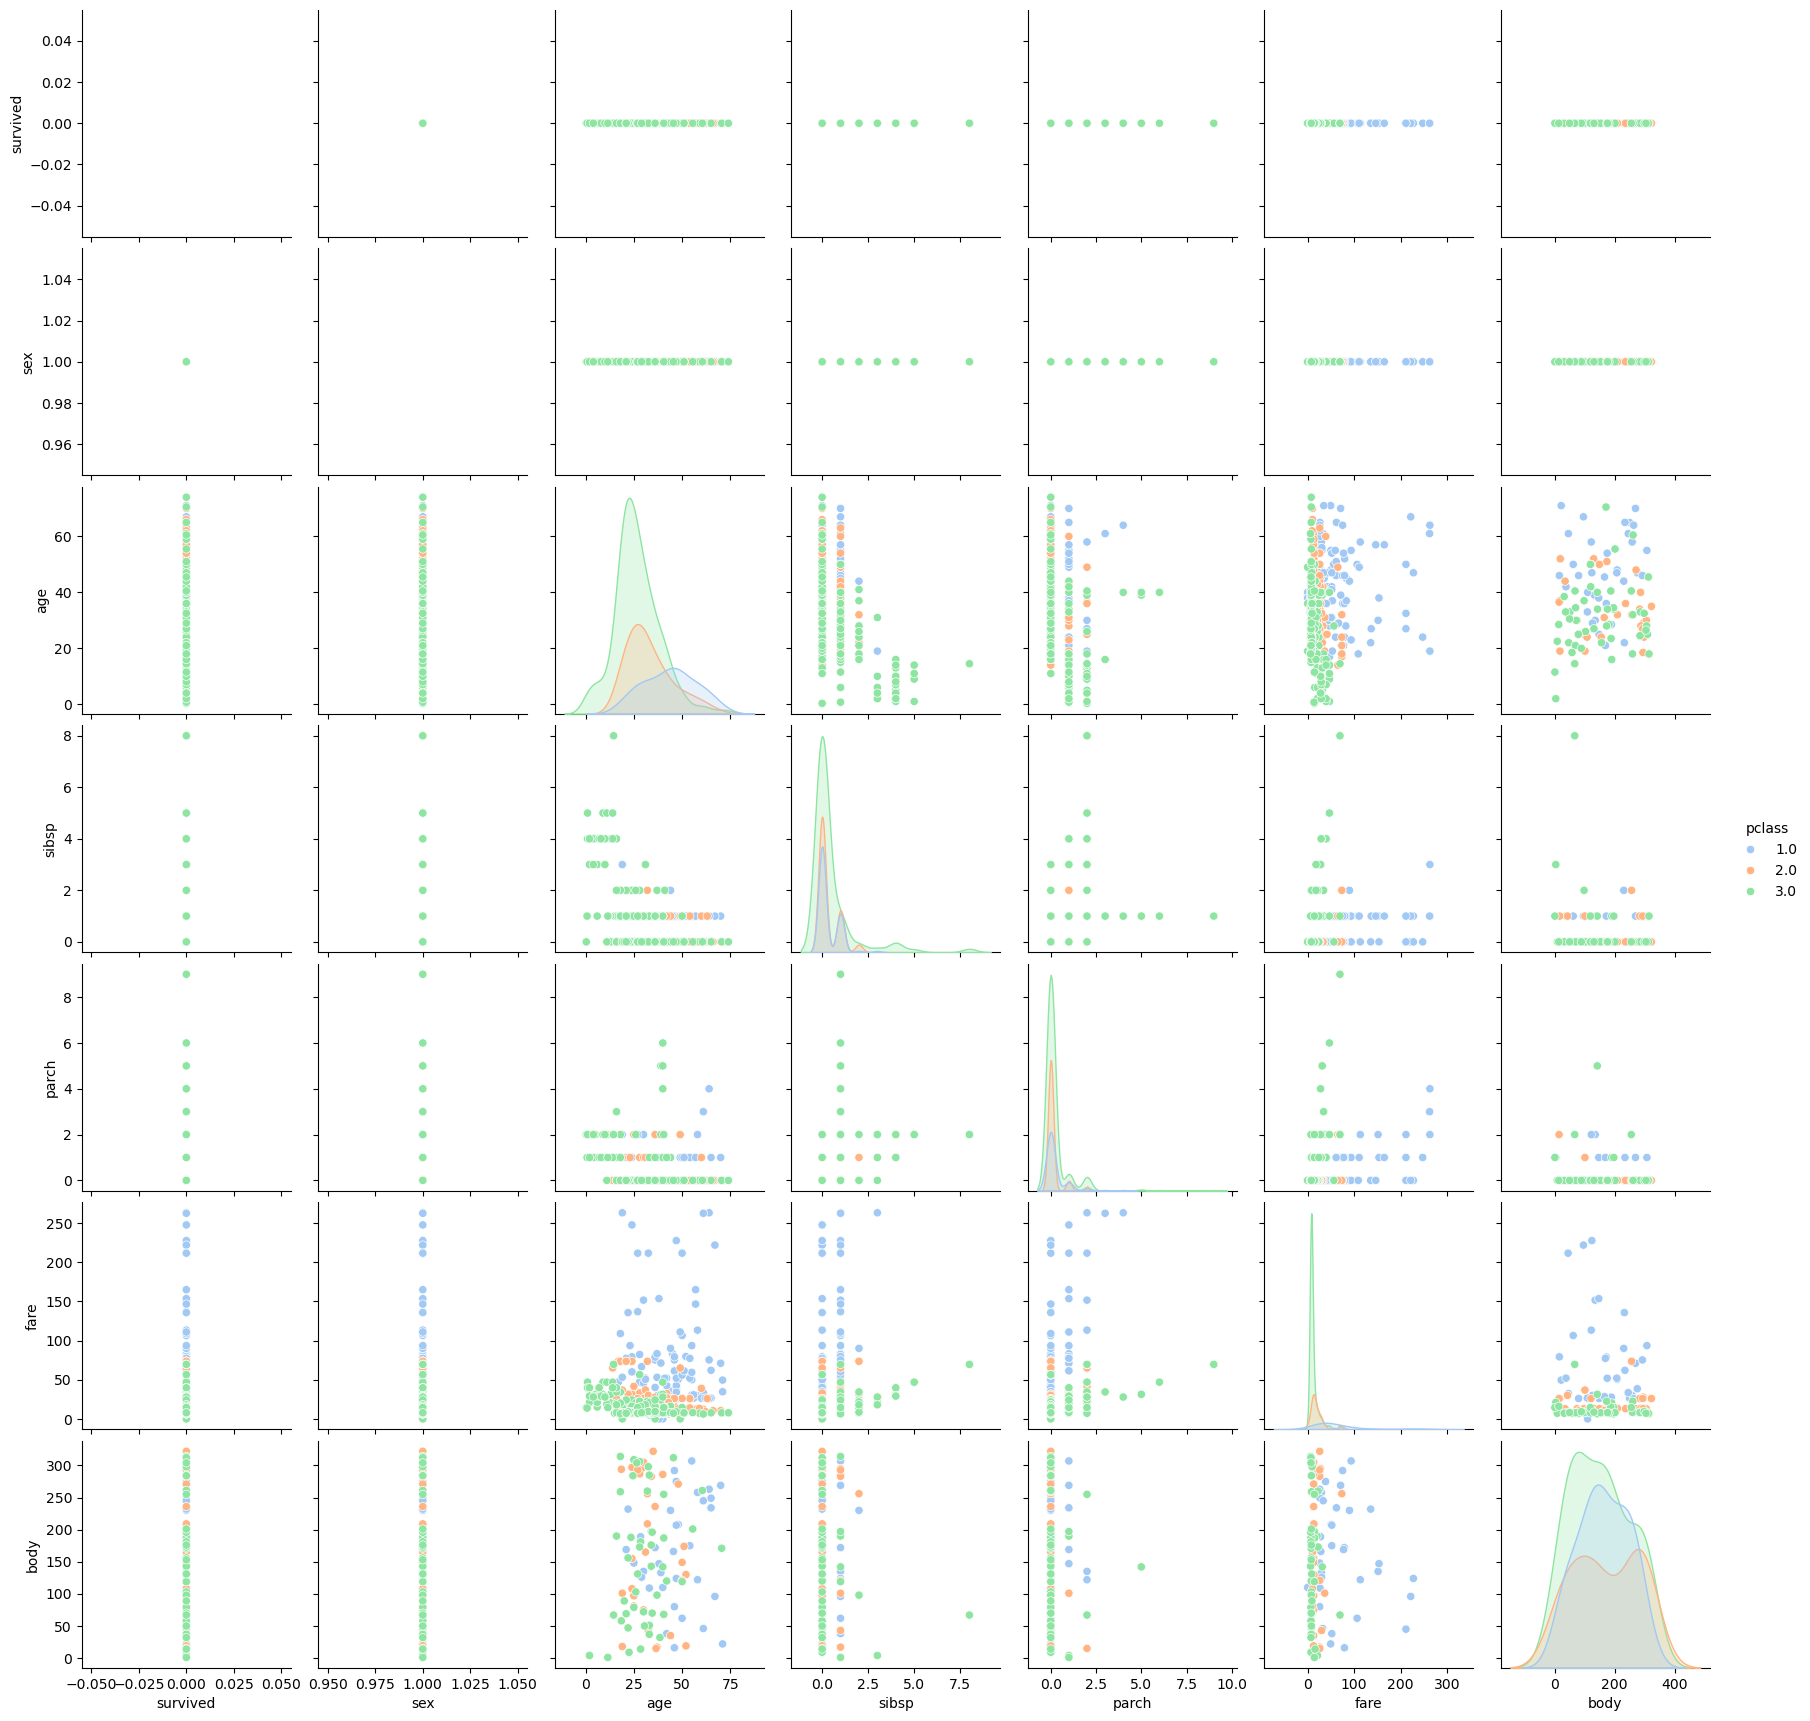

In [50]:
mezczyzni_umarli_class = df[(df["sex"] == 1) & (df['survived'] == 0)]
sns.pairplot(mezczyzni_umarli_class, hue='pclass', palette="pastel")

#### Tutaj większa przewaga klasy 3. Większość mężczyzn, którzy nie przeżyli, płynęła samotnie w klasie 3.

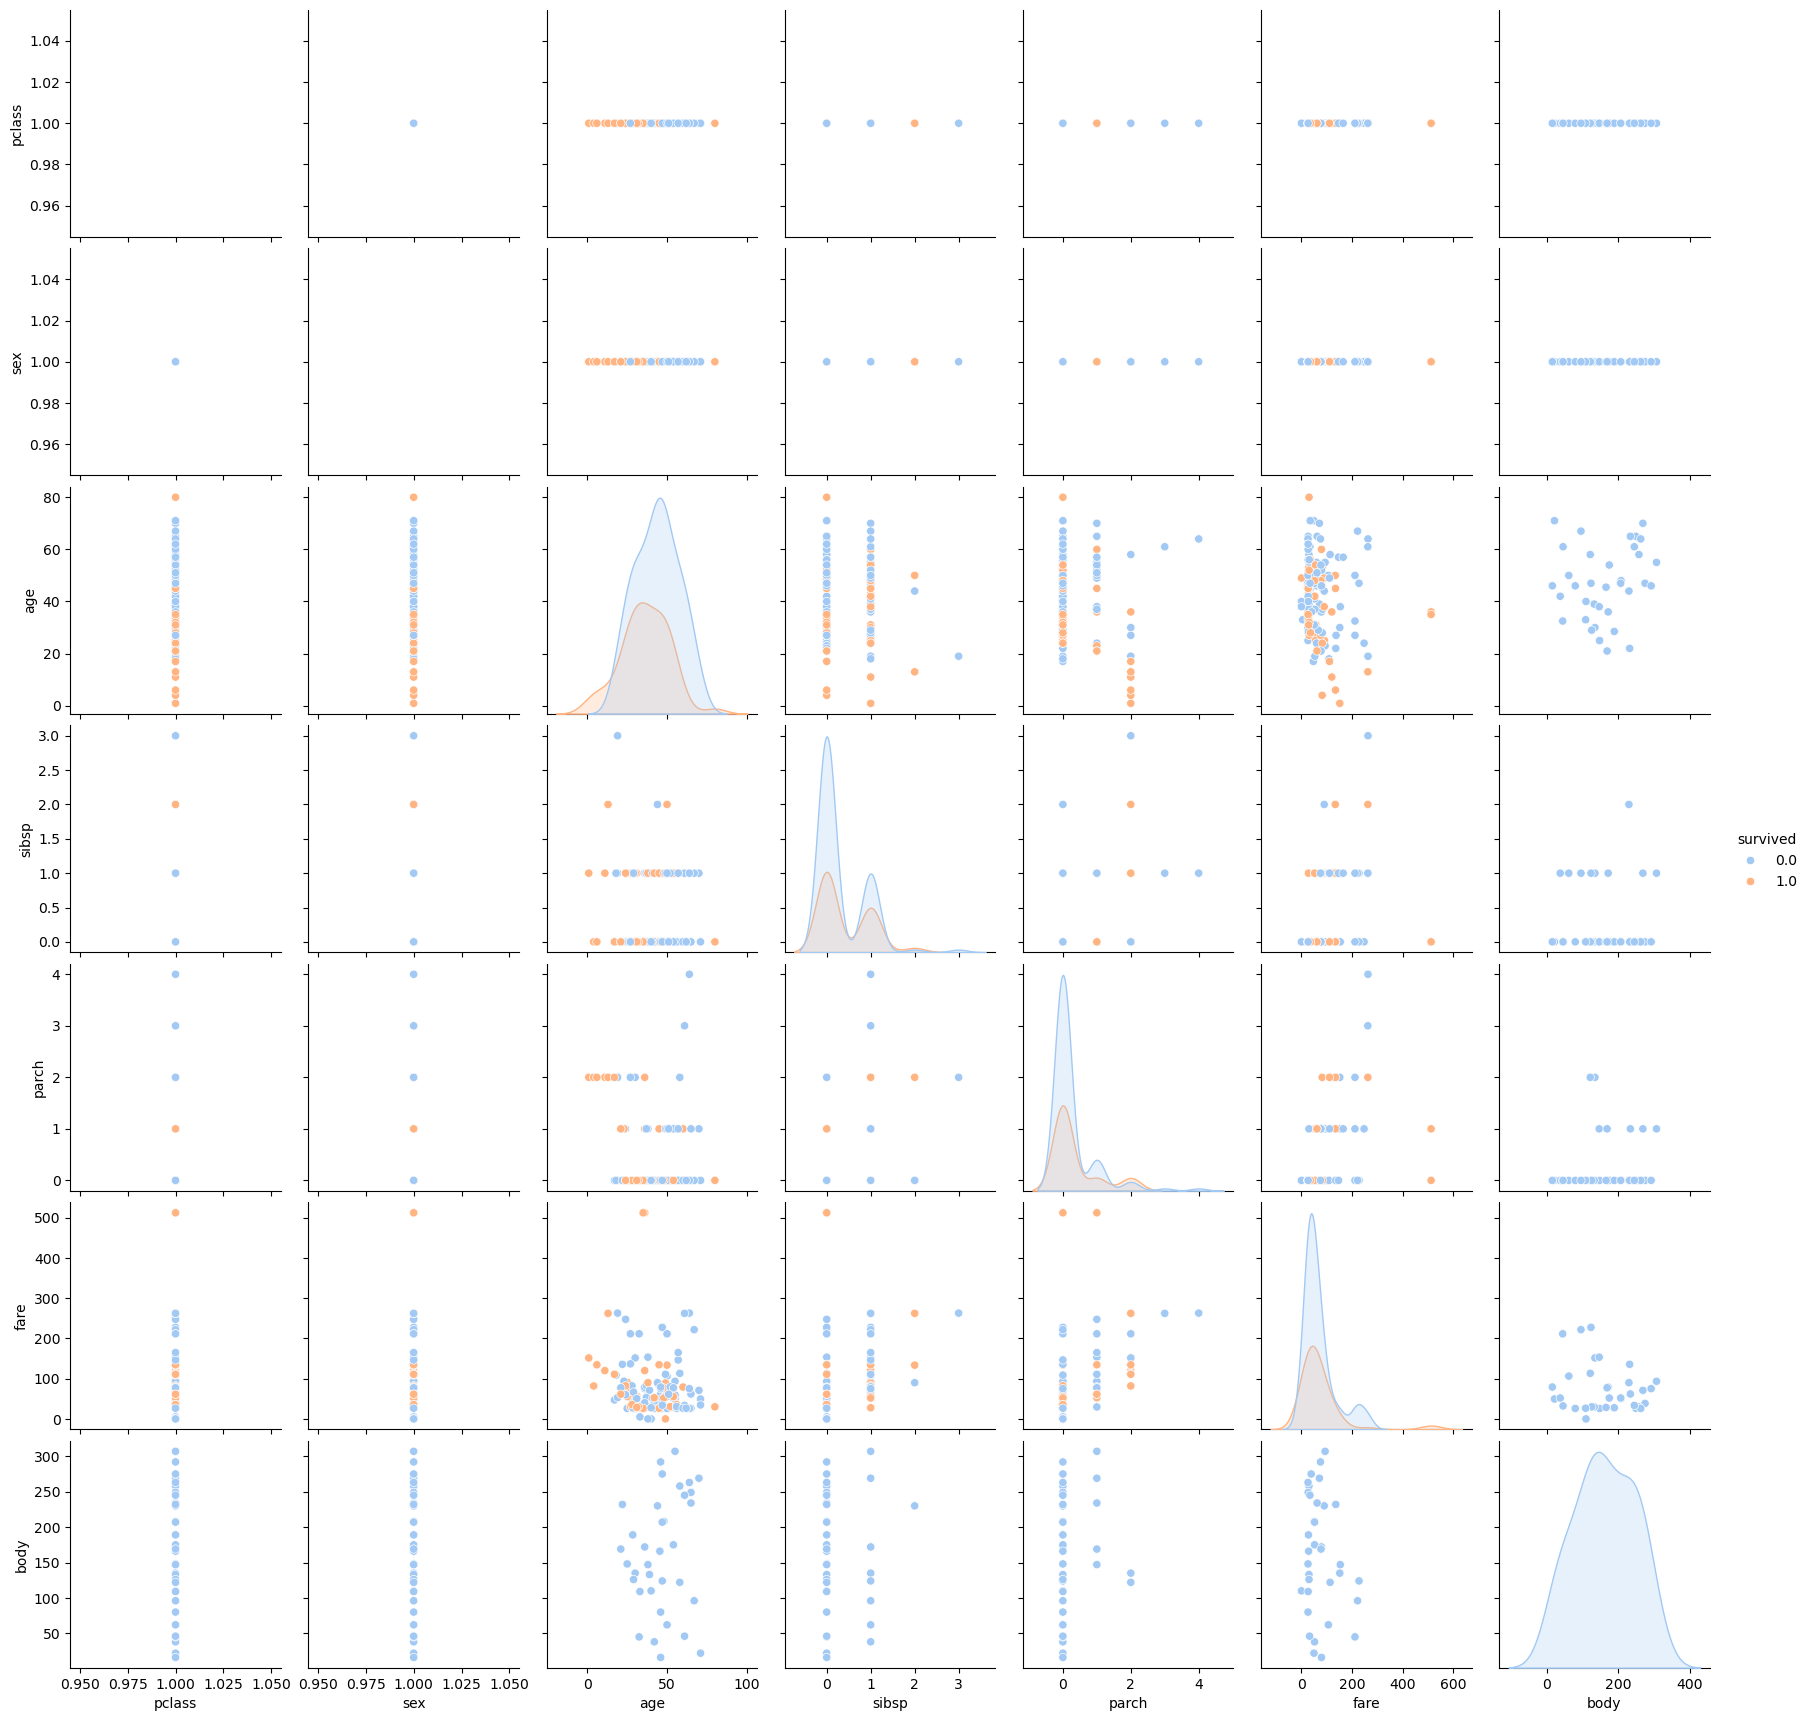

In [51]:
mezczyzni_class1 = df[(df["sex"] == 1) & (df['pclass'] == 1)]
sns.pairplot(mezczyzni_class1, hue='survived', palette="pastel")

#### Mężczyźni płynący w klasie 1 przeżyli, jeśli mieli tańszy bilet (płynęli na krótszym dystansie?) i byli młodsi (do 40 lat) i płynęli samotnie.

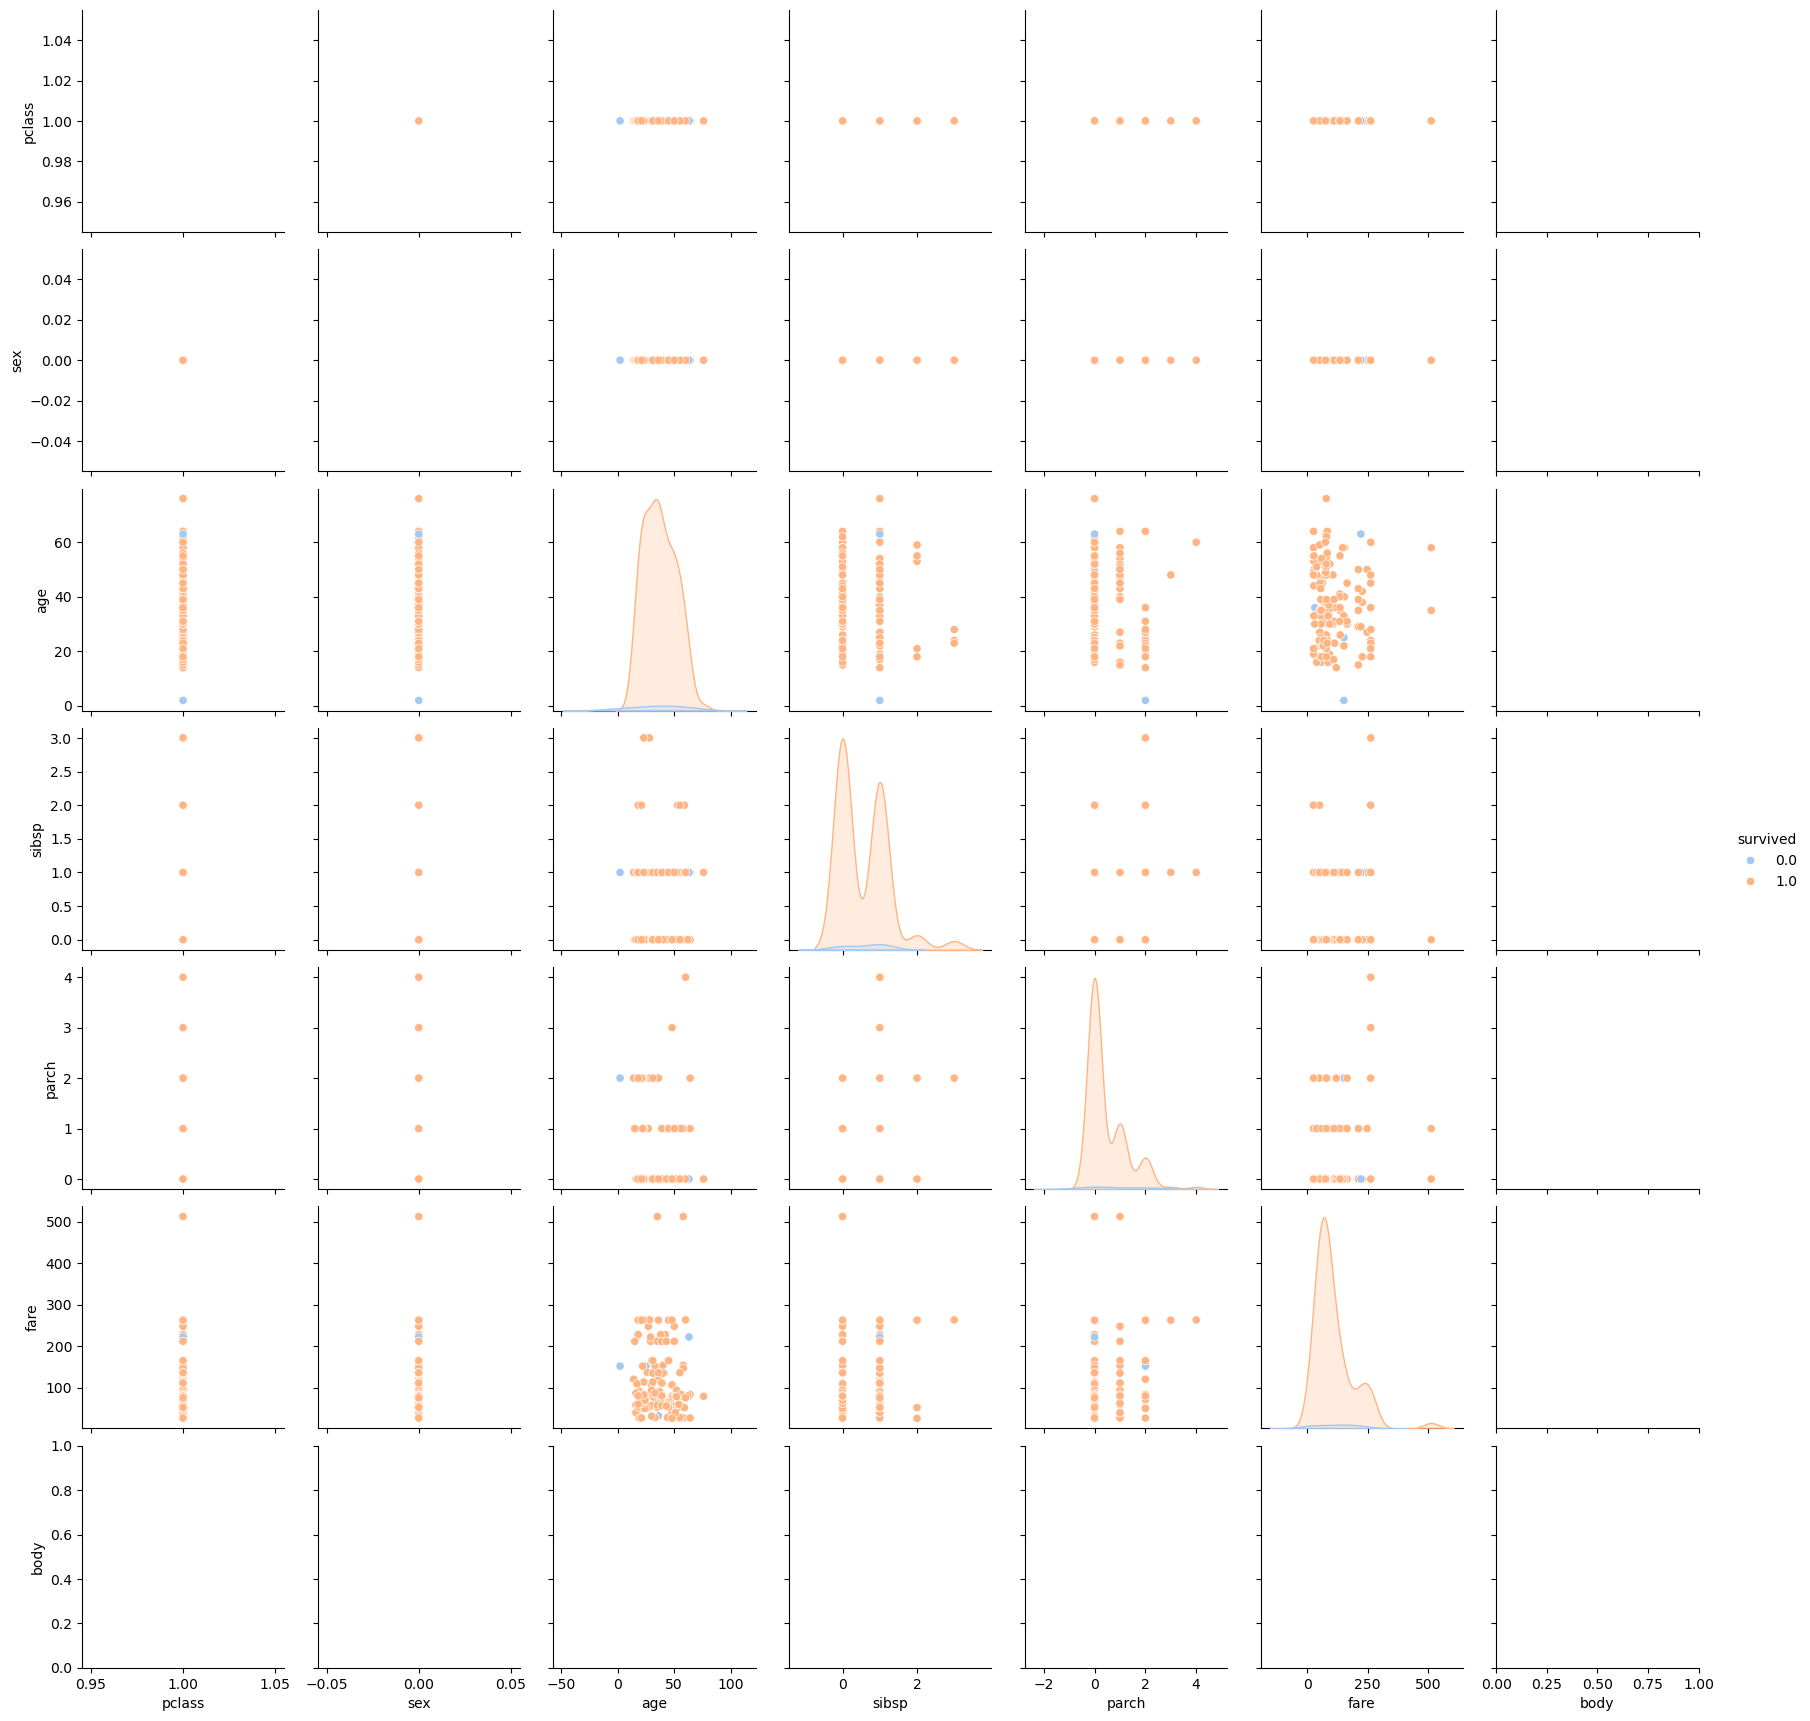

In [52]:
kobiety_class1 = df[(df["sex"] == 0) & (df['pclass'] == 1)]
sns.pairplot(kobiety_class1, hue='survived', palette="pastel")

#### W większości kobiety płynące w klasie 1 przeżyły. 
#### Ofiary zdarzały się wśród kobiet, które płynęły samotnie. 
#### Nie przeżyło niemowle płci żeńskiej, płynące 1 klasą.

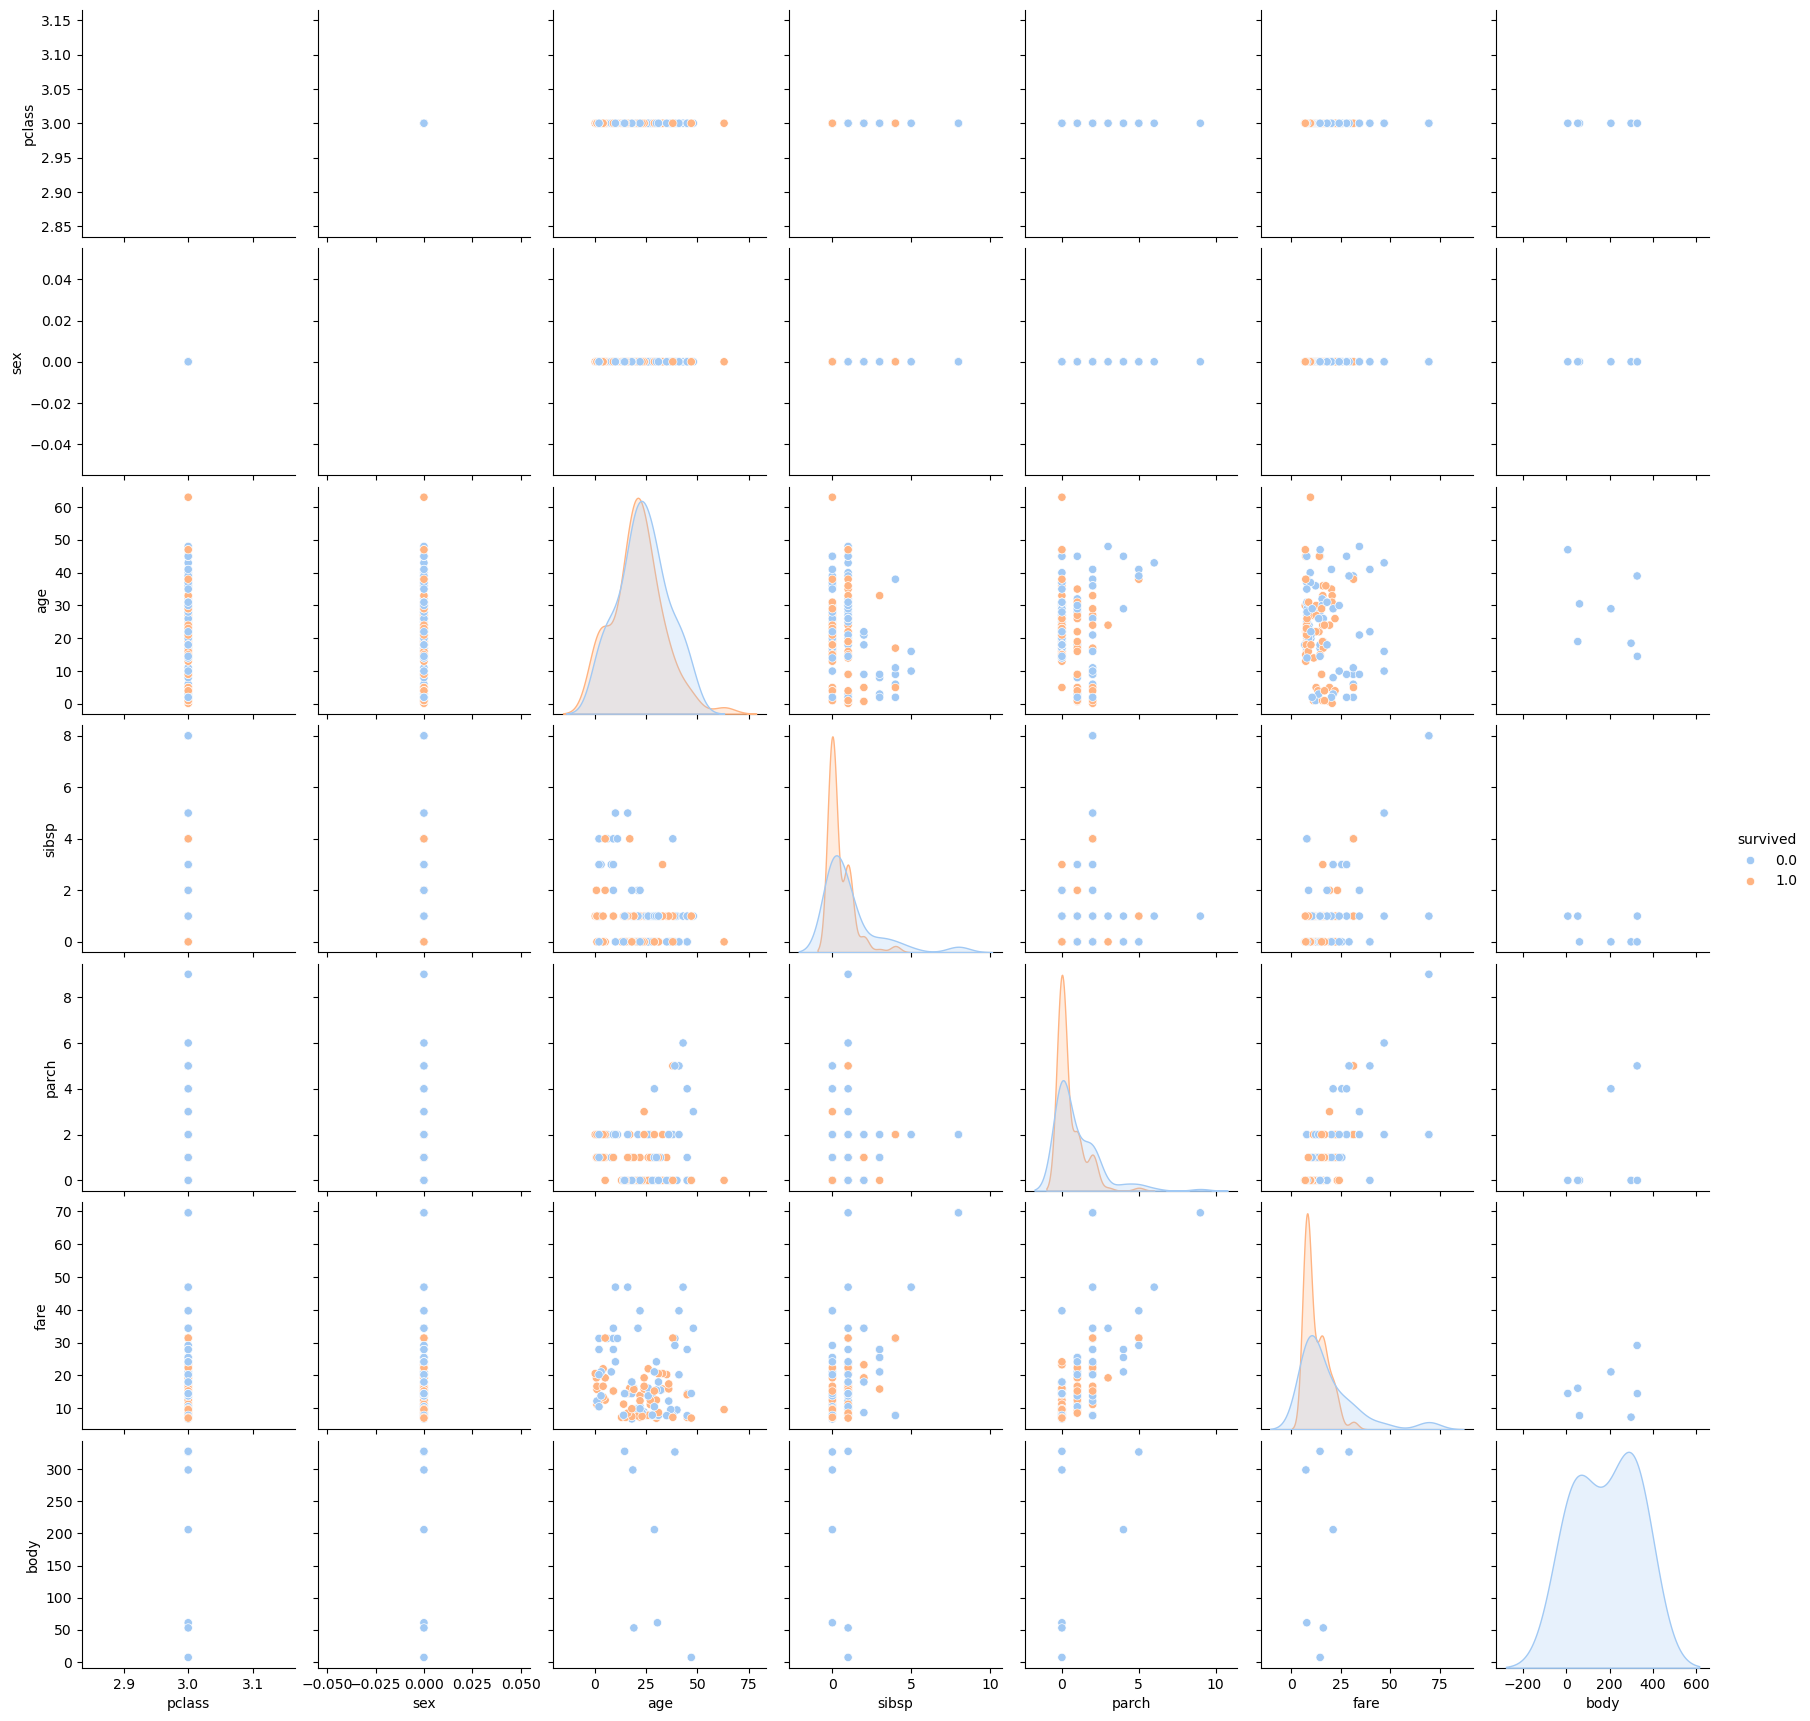

In [53]:
kobiety_class3 = df[(df["sex"] == 0) & (df['pclass'] == 3)]
sns.pairplot(kobiety_class3, hue='survived', palette="pastel")

#### W klasie 3 było więcej przypadków ofiar wśród kobiet.
#### Kobiety, które płynęły na droższym bilecie (dłuższym rejsem?) w tej klasie, nie przeżyły. 
#### osoby, które płynęły w towarzystwie od 3 do 8 osób, przeżyły.

## Ofiary wśród kobiet z podziałem na klasy.

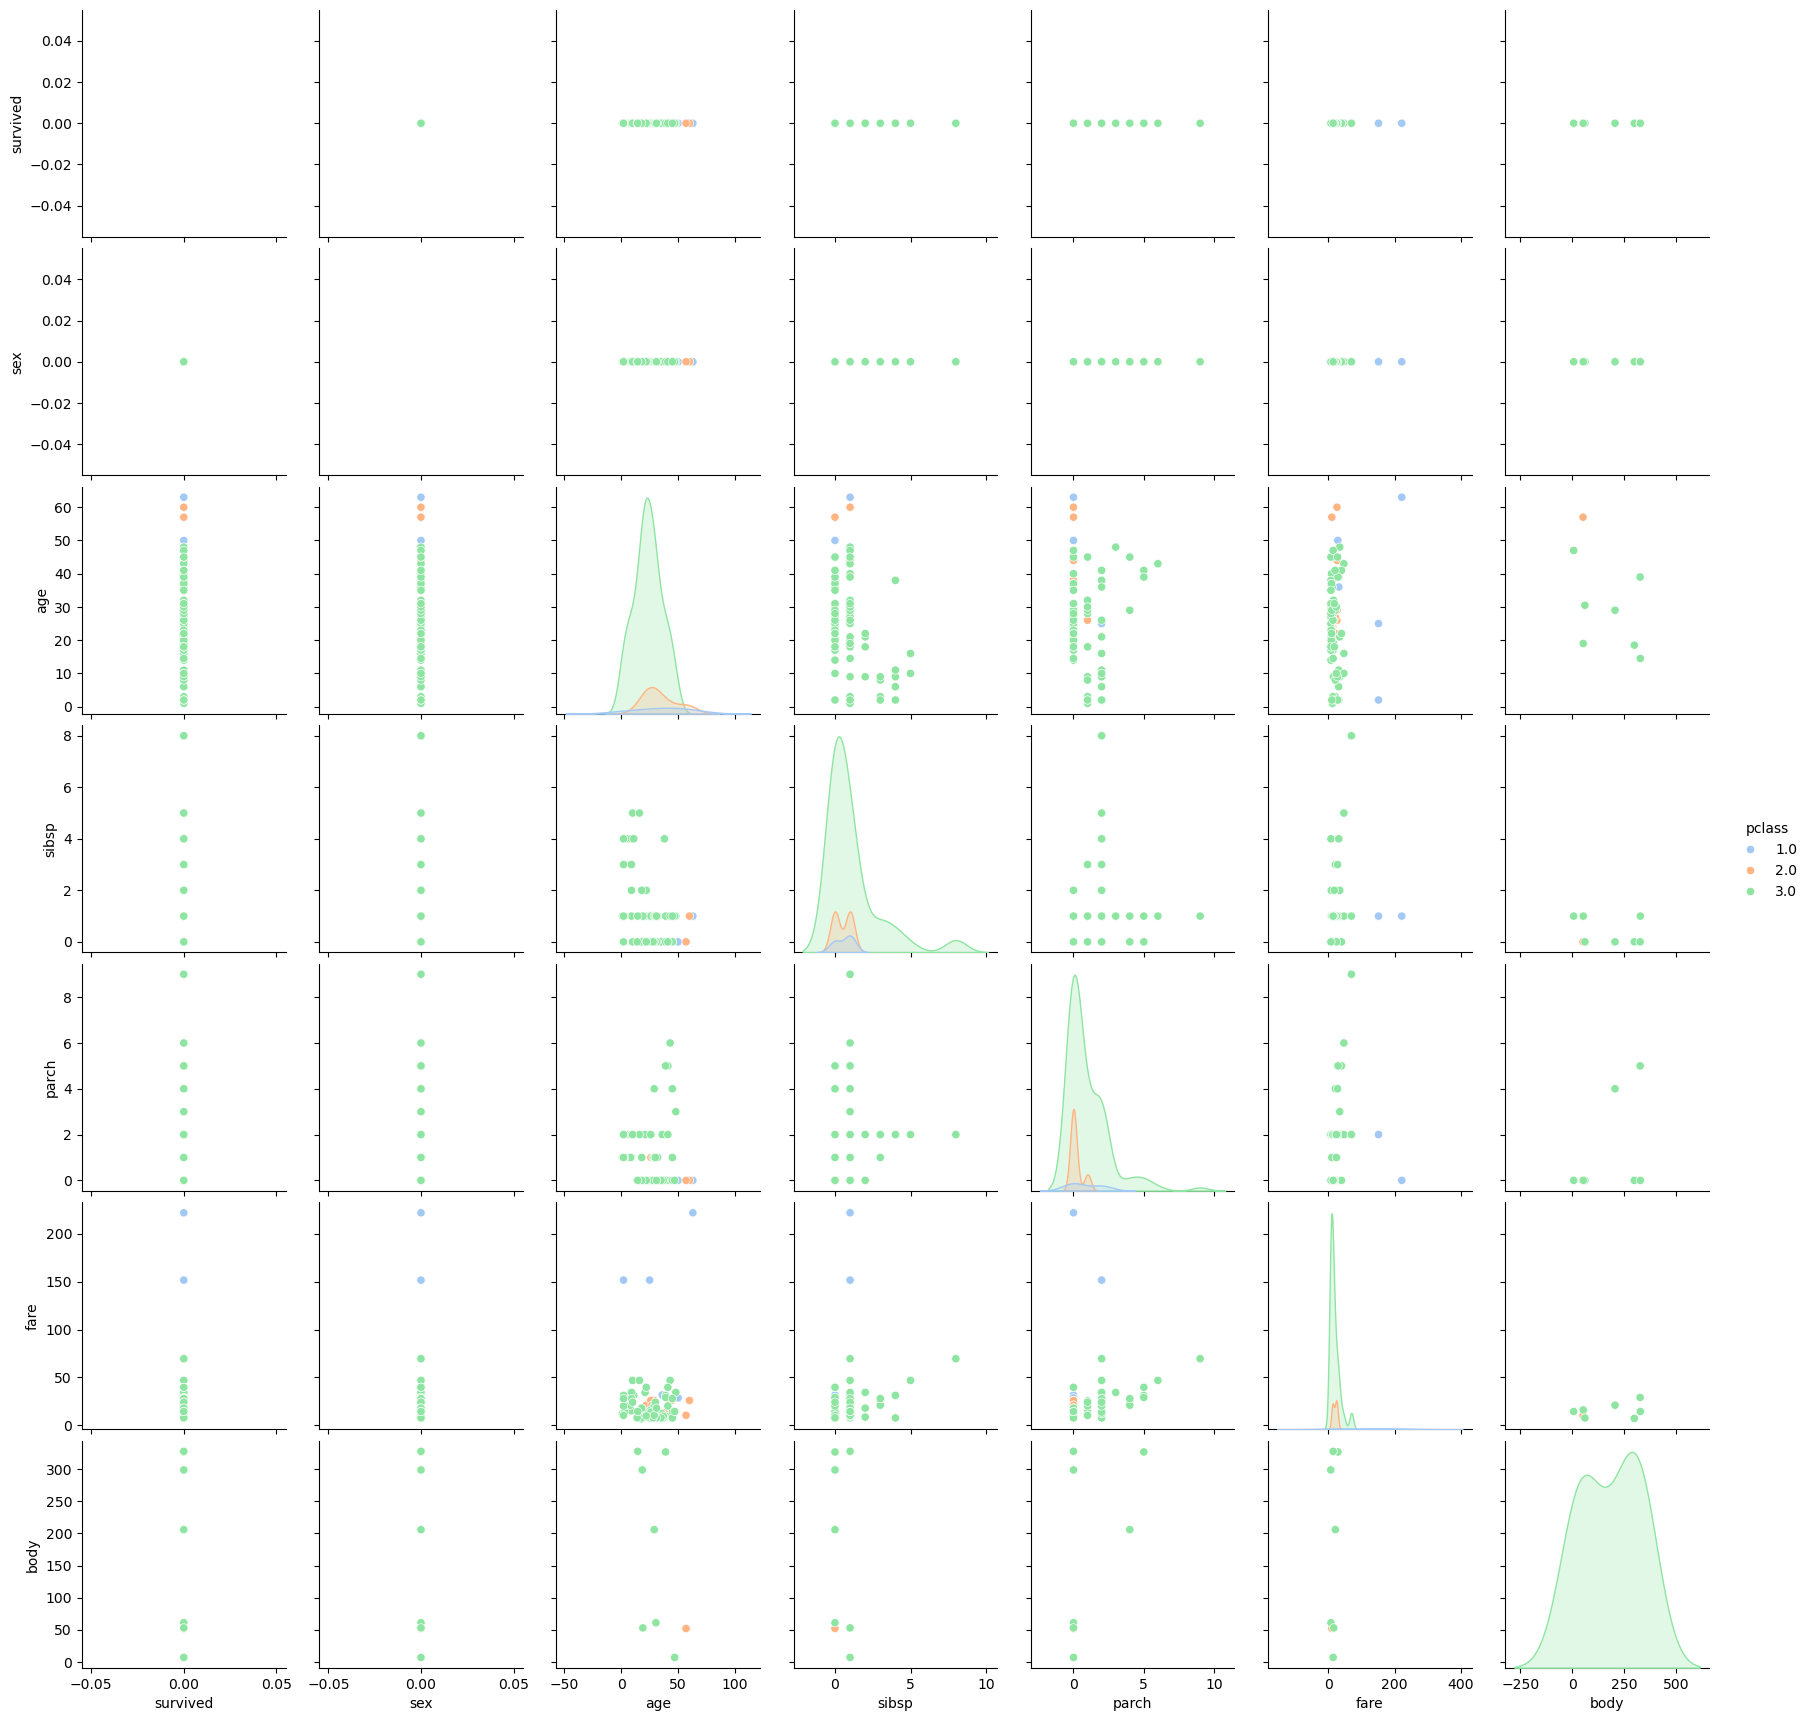

In [54]:
kobiety_ofiary_class = df[(df["sex"] == 0) & (df['survived'] == 0)]
sns.pairplot(kobiety_ofiary_class, hue='pclass', palette="pastel")

#### Wszędzie przewaga klasy 3. 

## Poniżej pairplot dla kobiet płynących całkowicie samotnie.

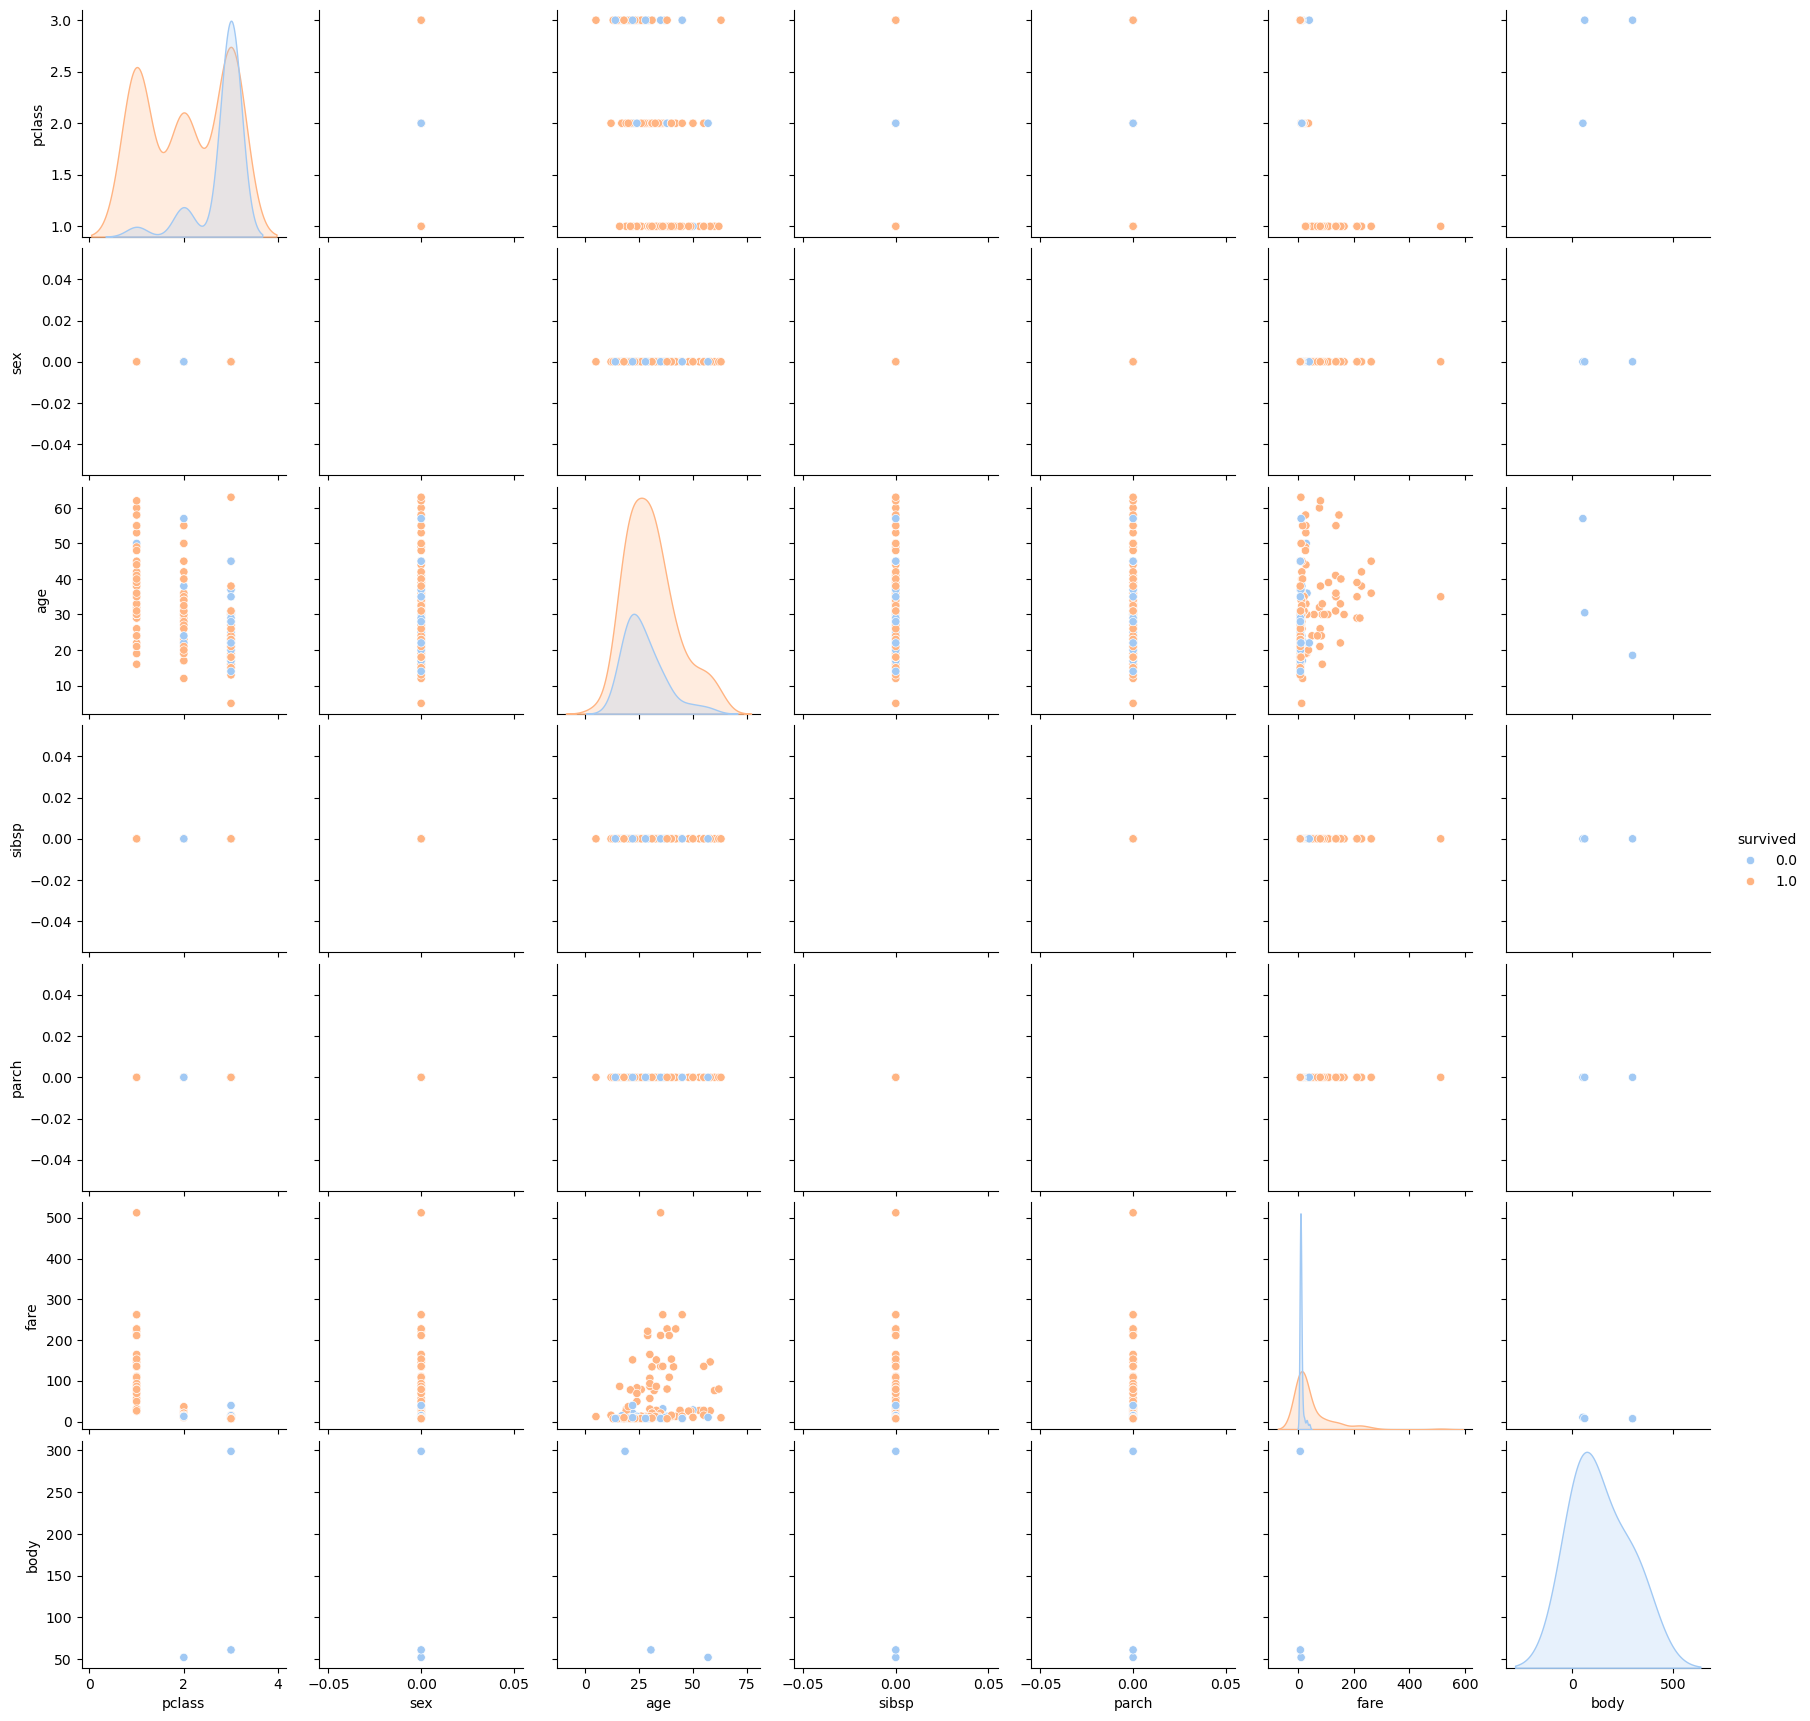

In [55]:
kobiety_parch0 = df[(df["sex"] == 0) & (df['parch'] == 0) & (df['sibsp'] == 0)]
sns.pairplot(kobiety_parch0, hue='survived', palette="pastel")

#### Większość przeżyła. Nie udało się przeżyć samotnym kobietom, jeśli płynęły szczególnie w klasie 3 oraz gdy miały poniżej 30 lat.

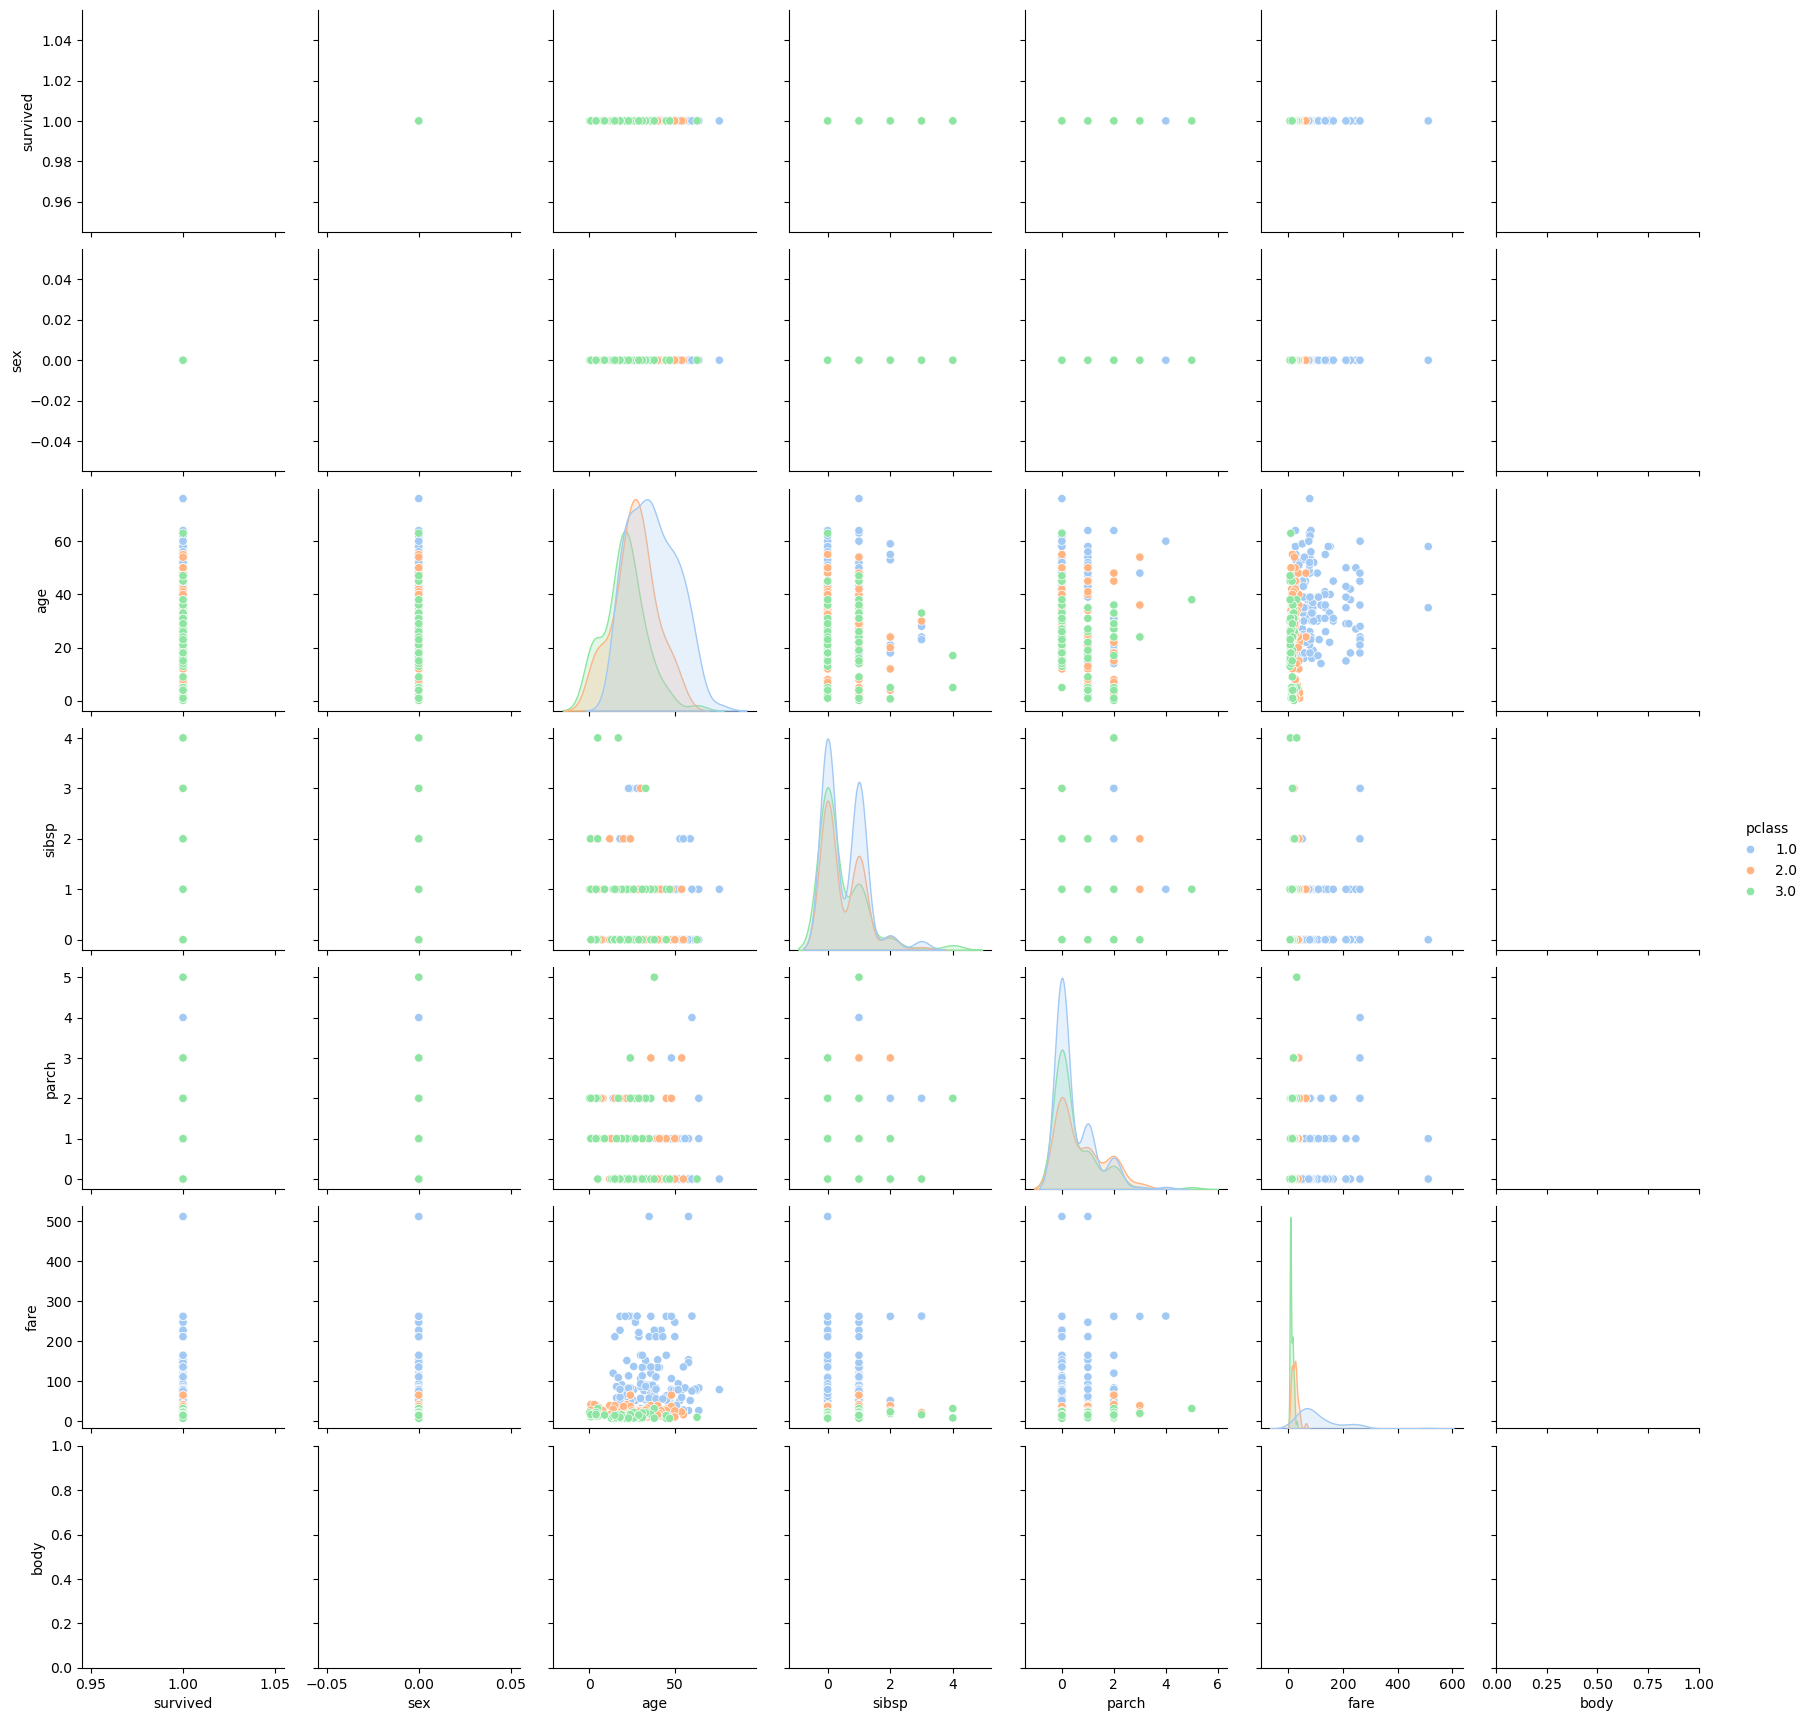

In [61]:
kobiety_uratowane_class = df[(df["sex"] == 0) & (df['survived'] == 1)]
sns.pairplot(kobiety_uratowane_class, hue='pclass', palette="pastel")

### w klasie 1 płynęły kobiety starsze i na dalszy rejs (?).

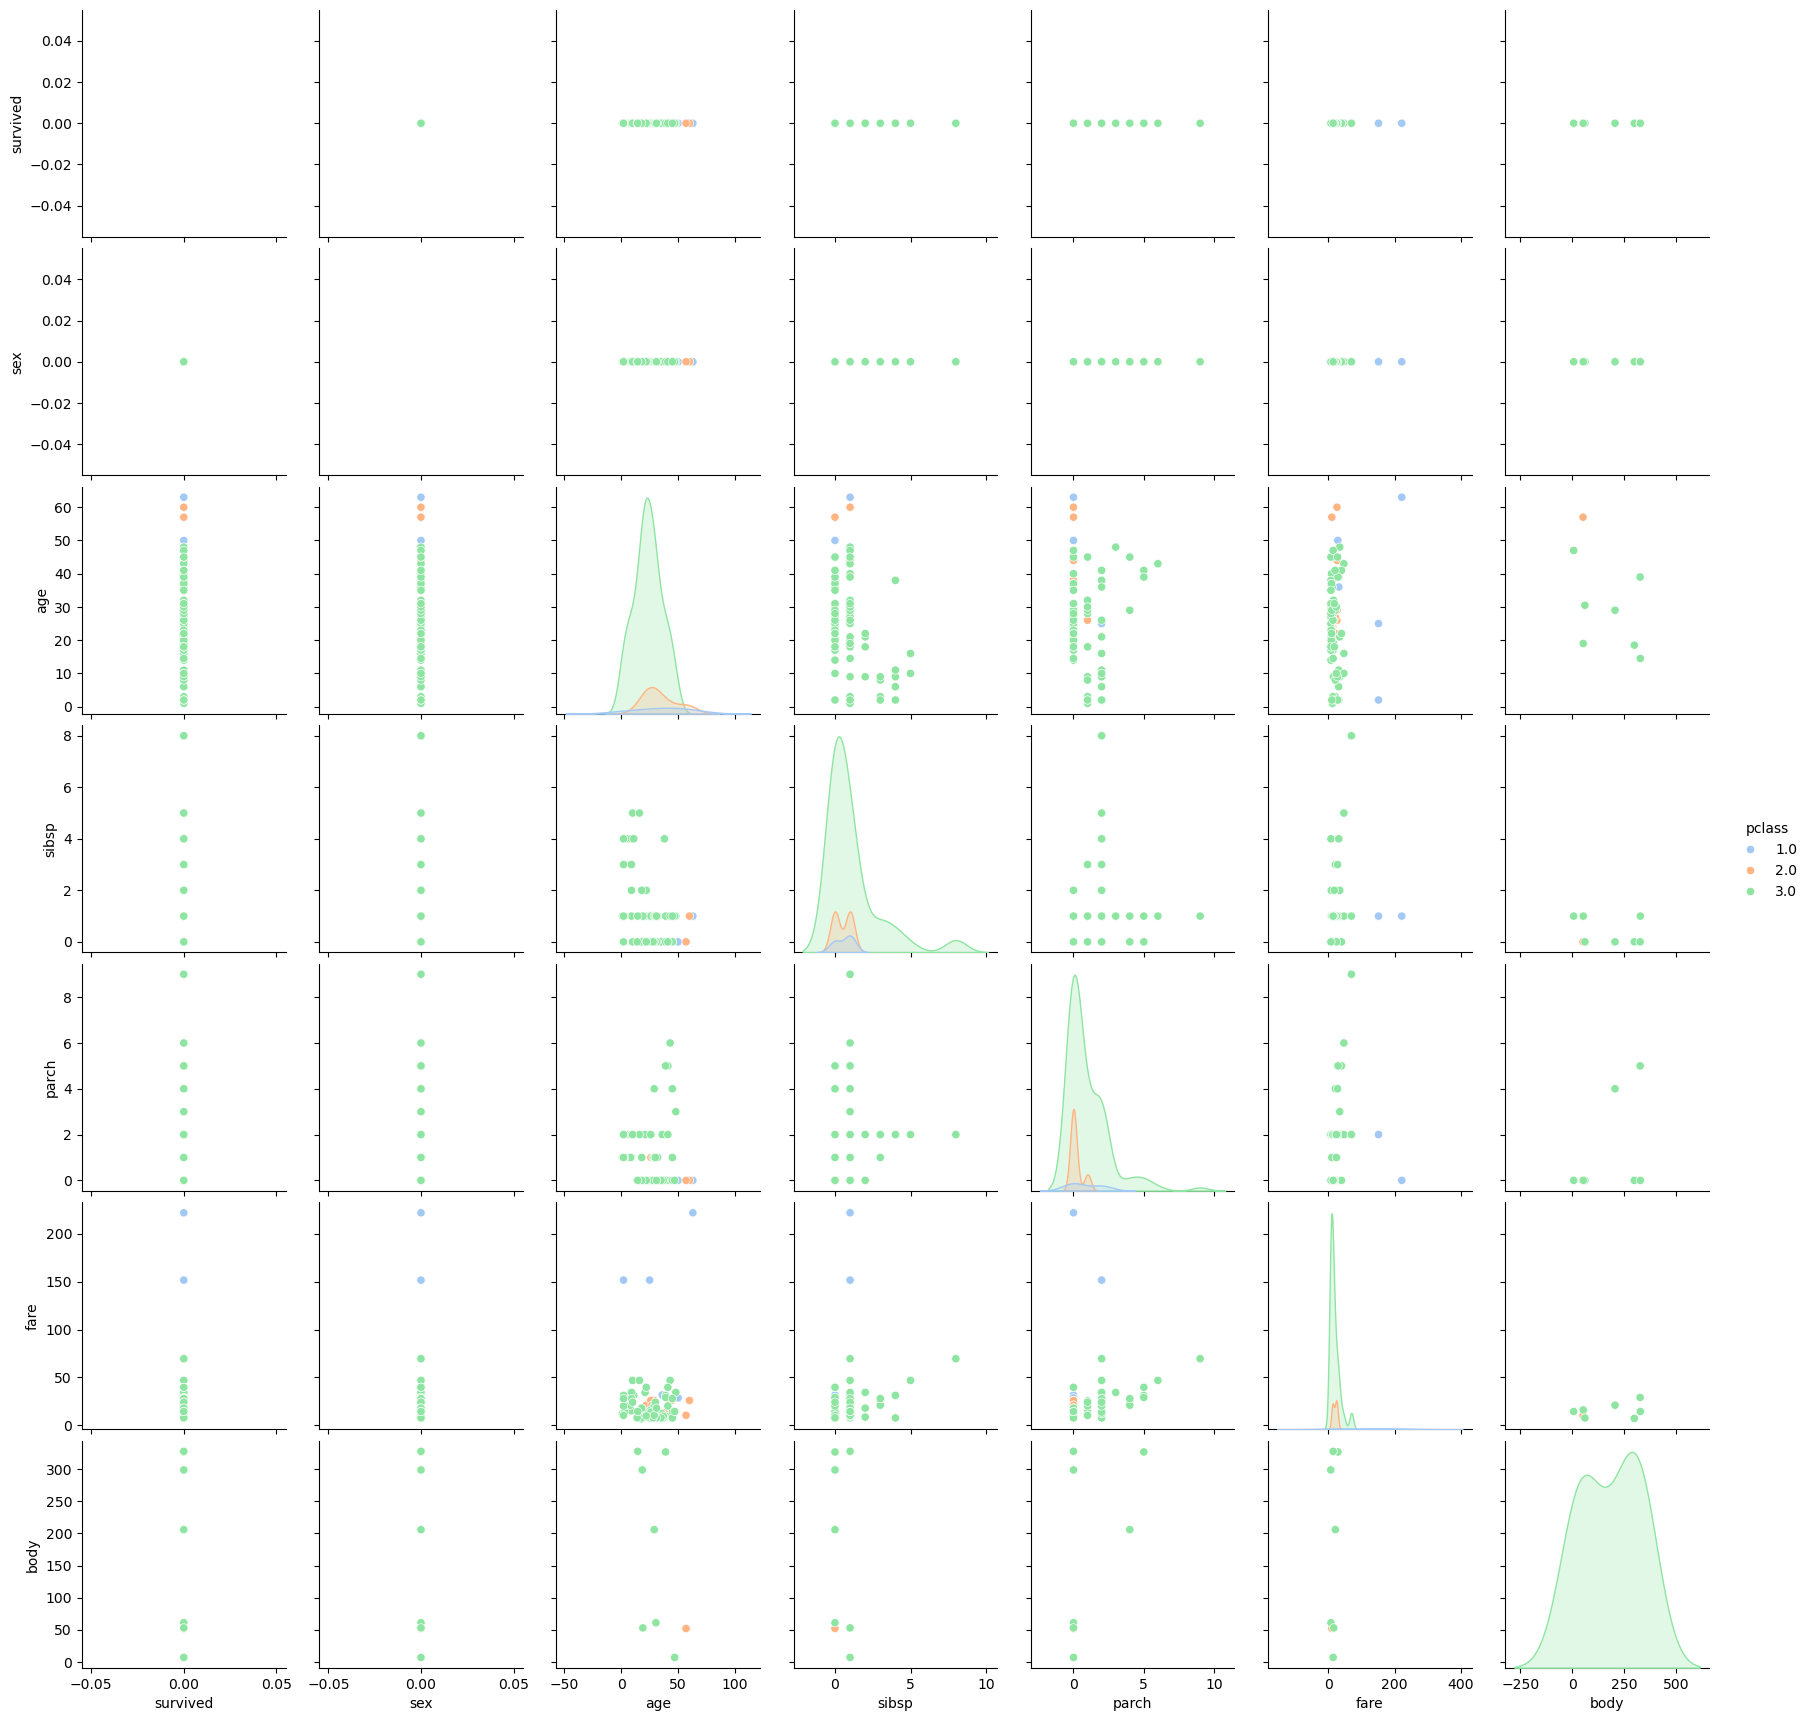

In [56]:
kobiety_ofiary_class = df[(df["sex"] == 0) & (df['survived'] == 0)]
sns.pairplot(kobiety_ofiary_class, hue='pclass', palette="pastel")

#### Przewaga klasy 3 i mniej osób towarzyszących.

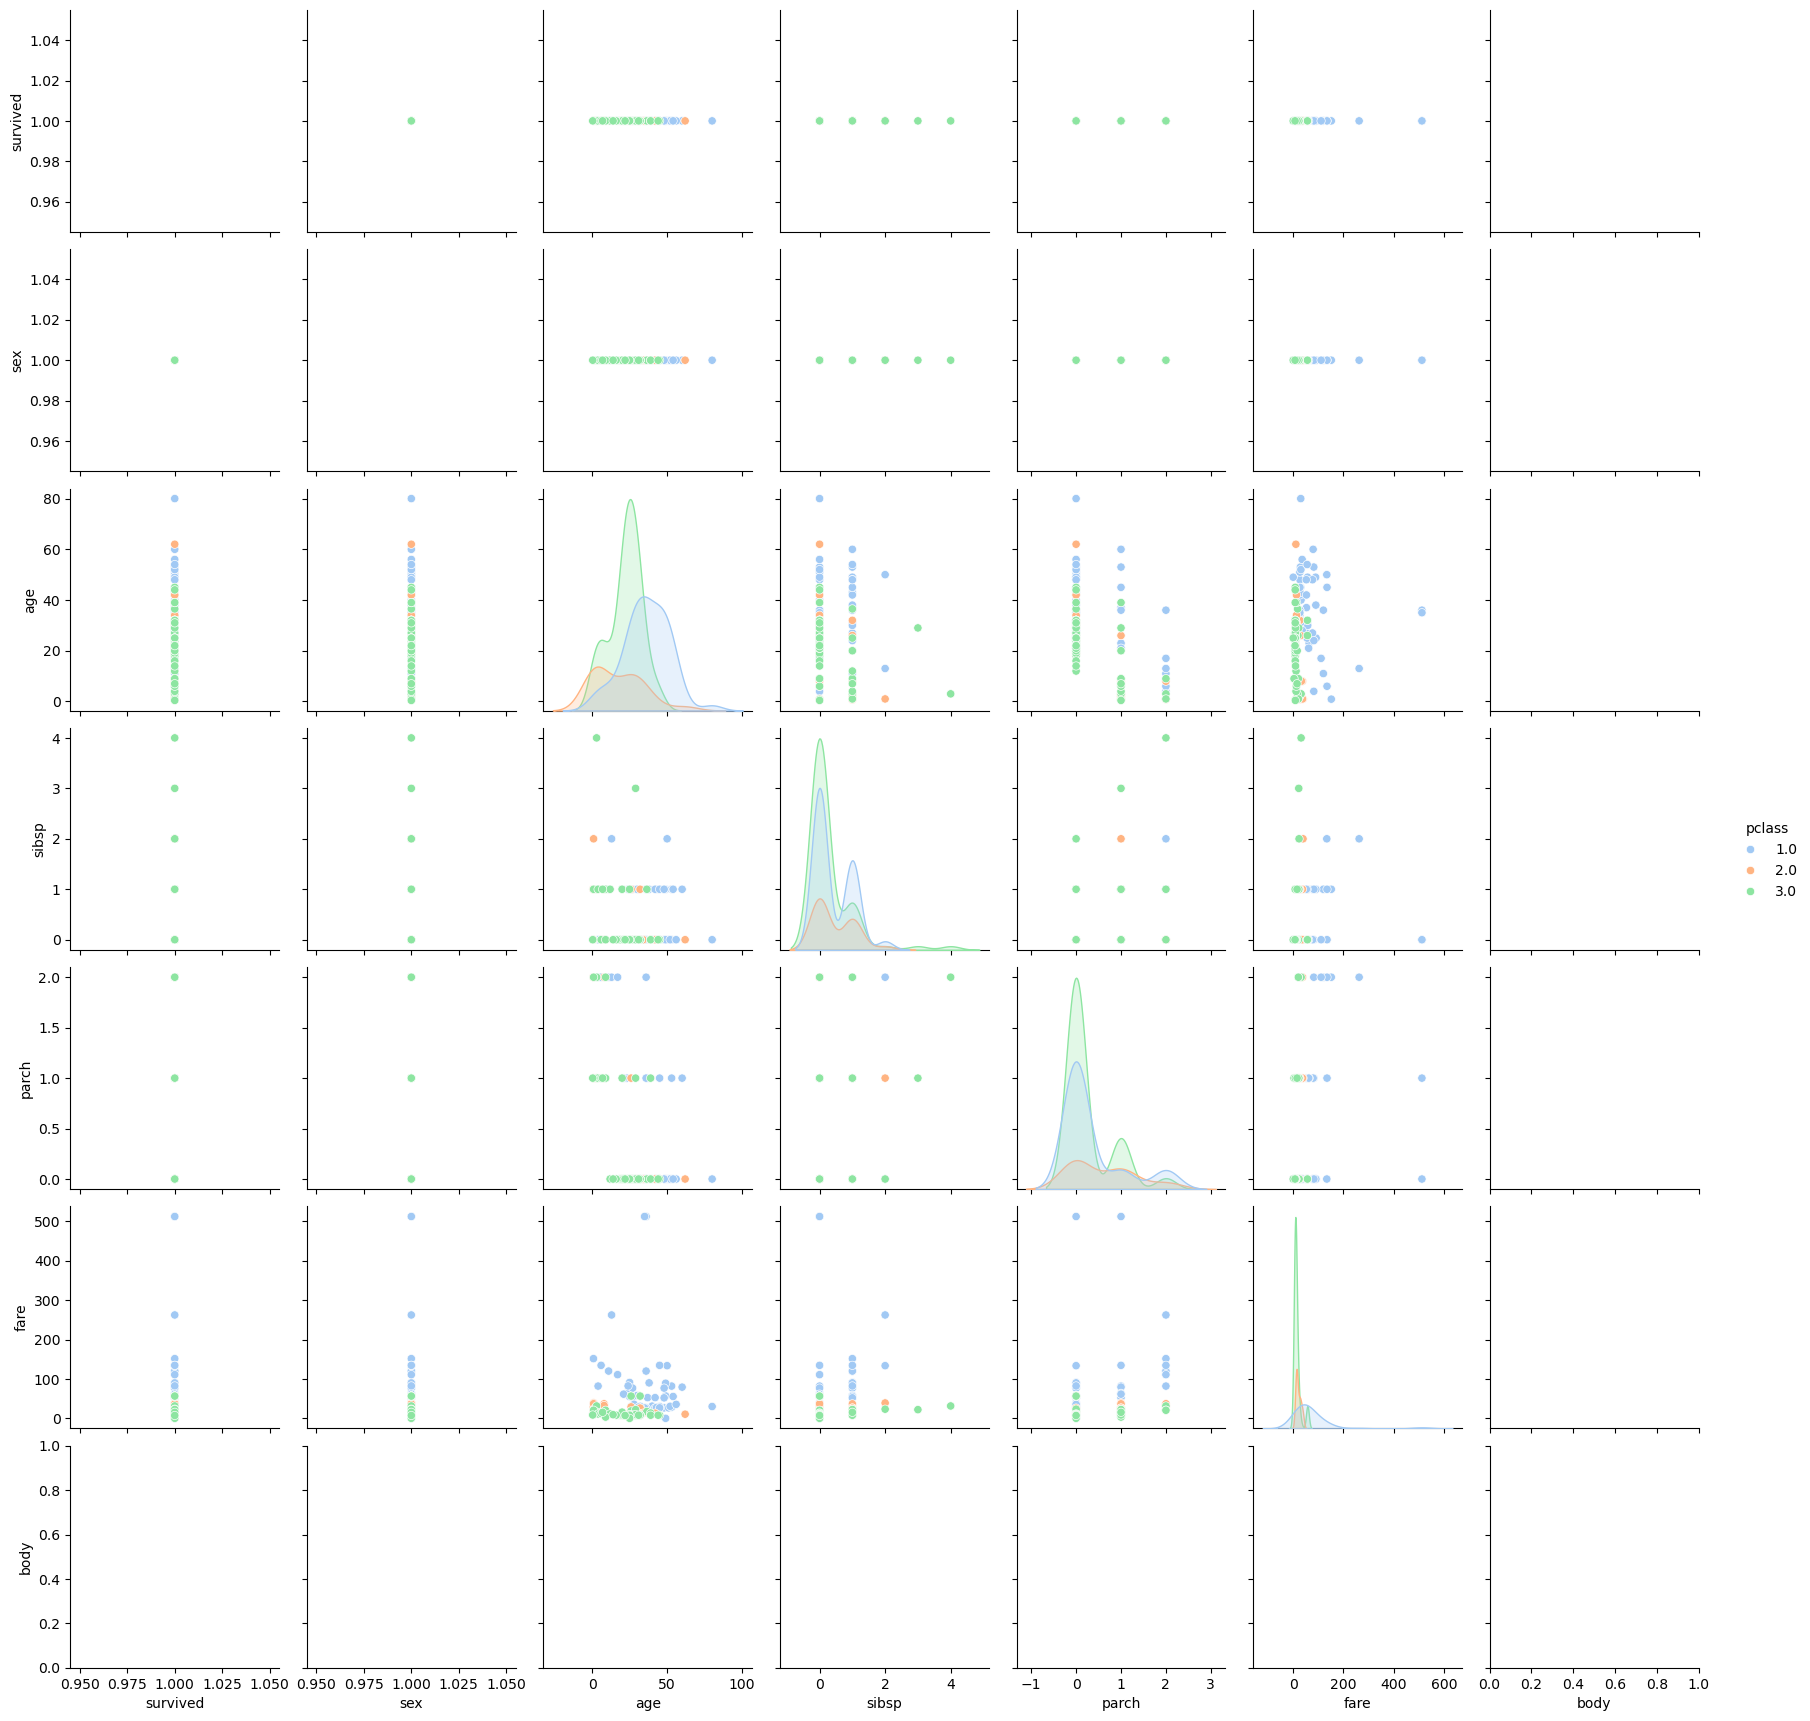

In [57]:
mezczyzni_ofiary_class = df[(df["sex"] == 1) & (df['survived'] == 1)]
sns.pairplot(mezczyzni_ofiary_class, hue='pclass', palette="pastel")

##### Spora część osób w klasie 1 i jednocześnie na dłuższym dystansie(?).

## Poniżej mężczyżni płynący całkowicie samotnie.

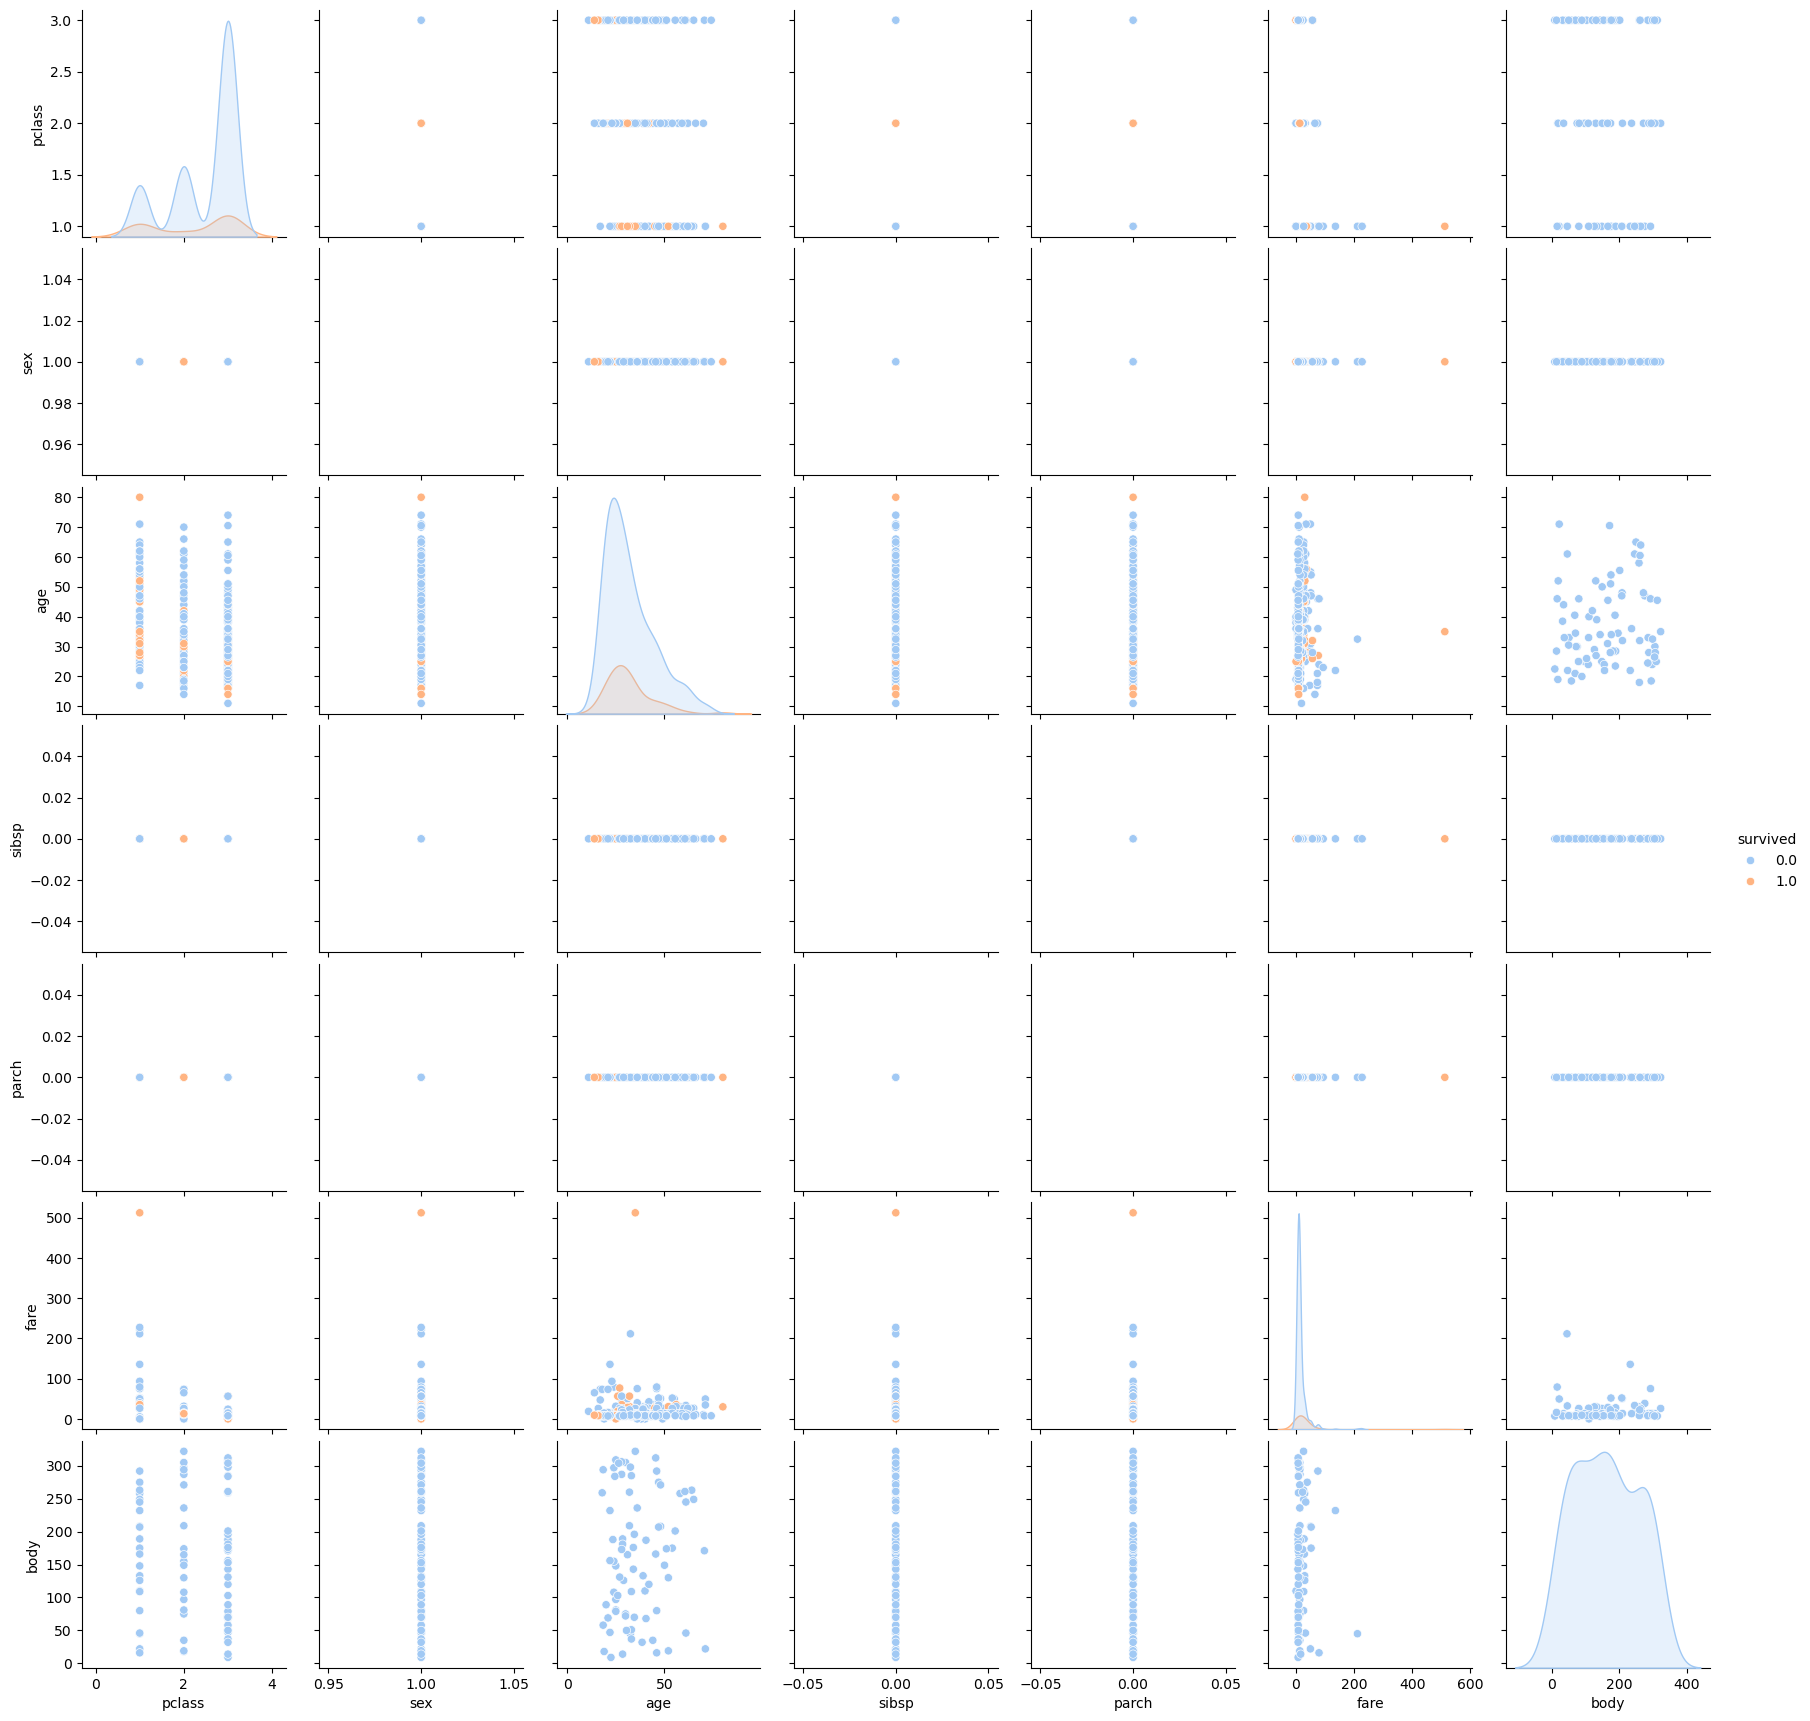

In [60]:
mezczyzni_parch0 = df[(df["sex"] == 1) & (df['parch'] == 0) & (df['sibsp'] == 0)]
sns.pairplot(mezczyzni_parch0, hue='survived', palette="pastel")

#### Większość nie przeżyła. Udało się przeżyć tym do 20 r.ż. 

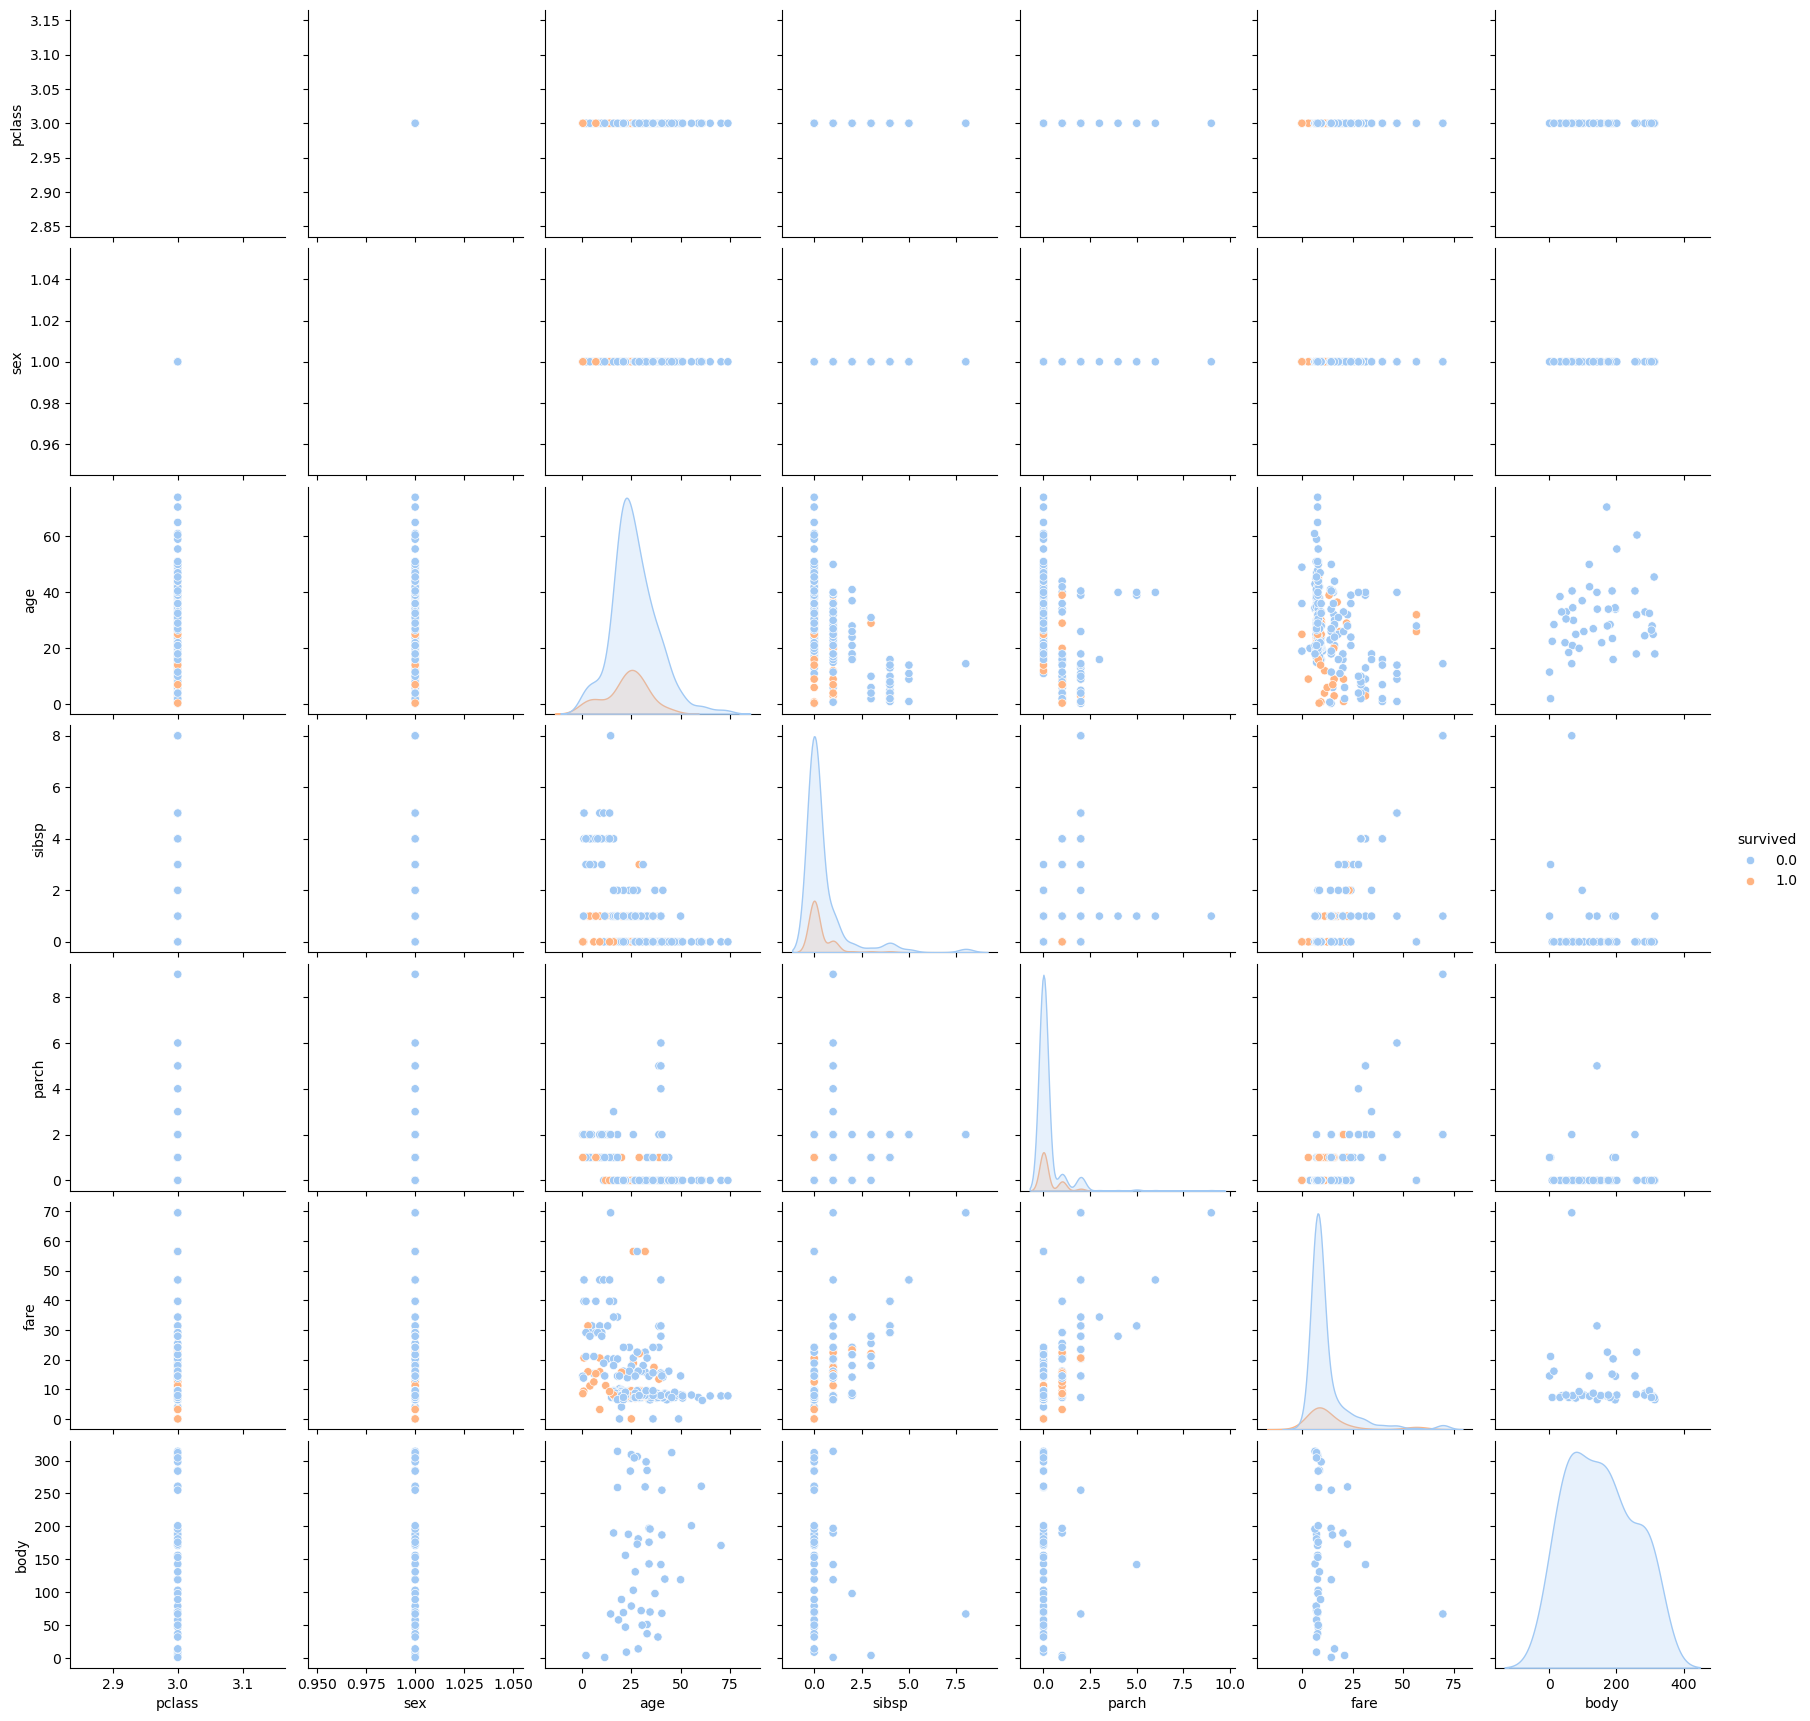

In [62]:
mezczyzni_class3 = df[(df["sex"] == 1) & (df['pclass'] == 3)]
sns.pairplot(mezczyzni_class3, hue='survived', palette="pastel")

#### Mężczyznom z klasy 3 najczęściej udało się przeżyć, jeśli płynęli samotnie lub z 1 osobą i mieli do 18 lat.

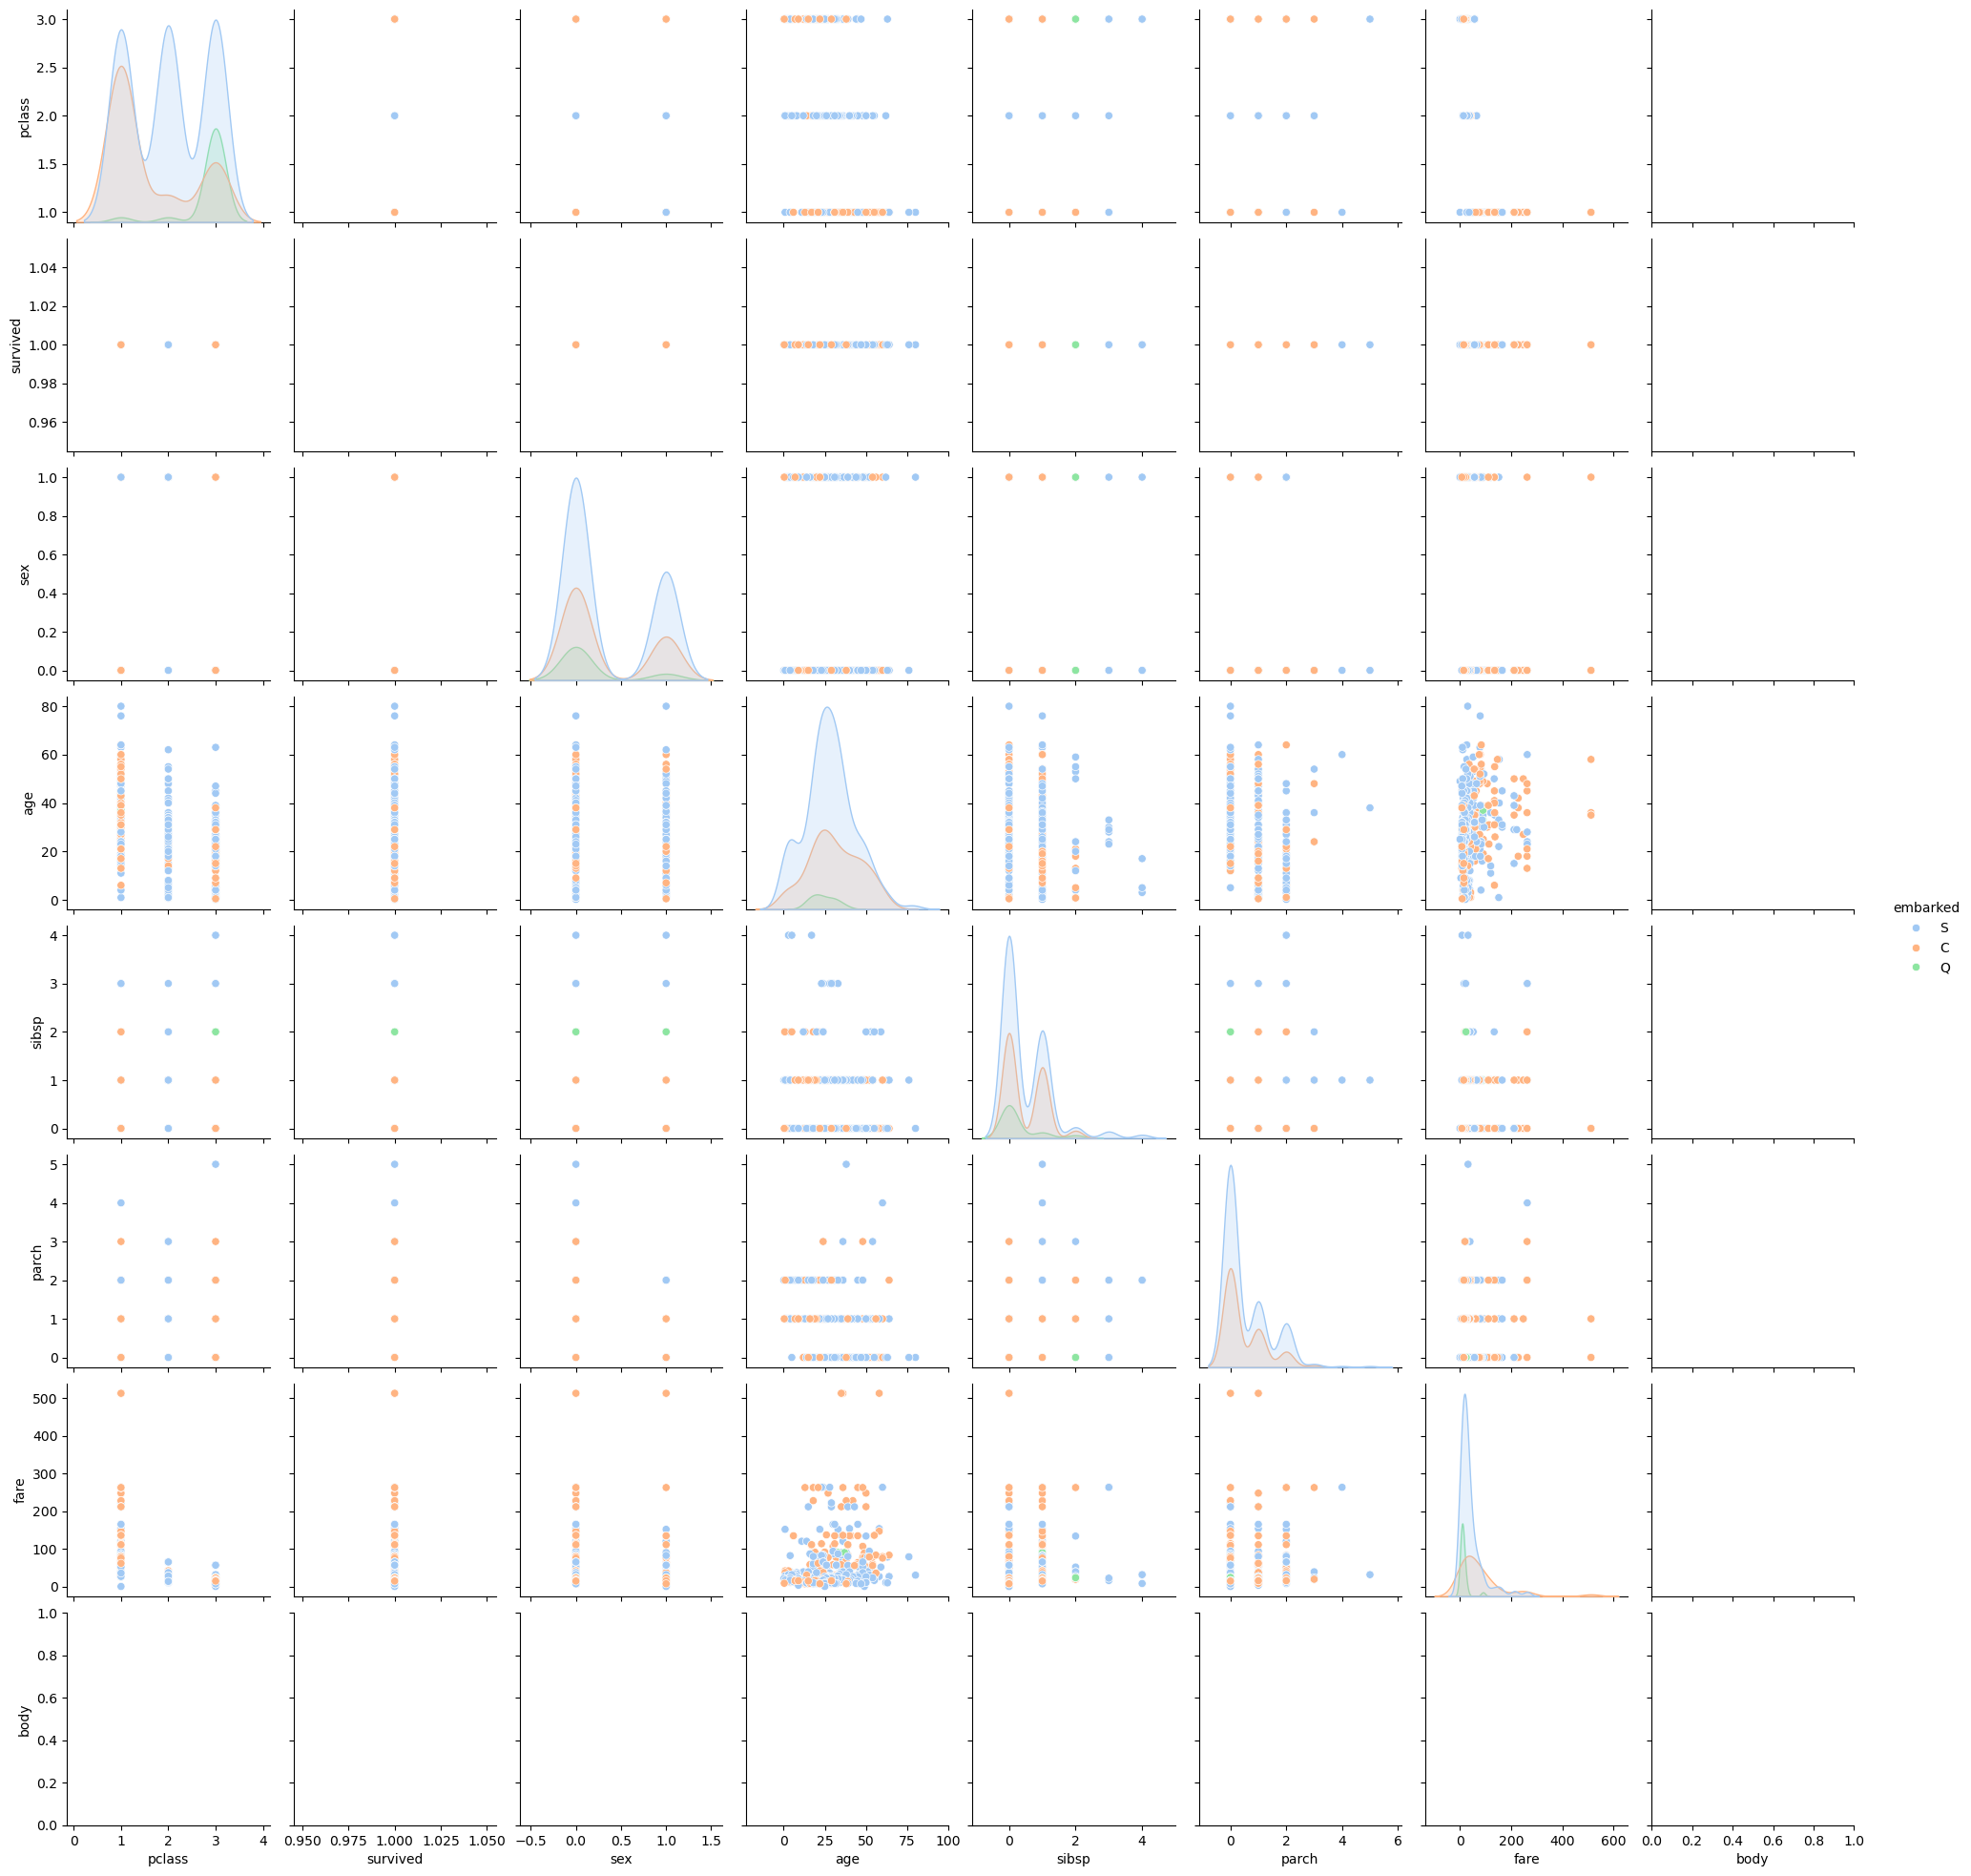

In [63]:
uratowani_port = df[(df['survived'] == 1)]
sns.pairplot(uratowani_port, hue='embarked', palette="pastel")

#### Pasażerowie klasy 2 i 3 wchodzili na statek najczęściej portem S. W klasie 1 wchodzili równie często S, jak i Q.

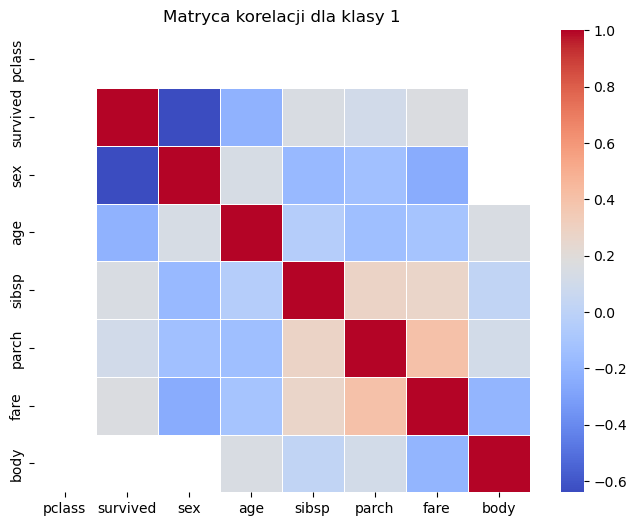

In [17]:
klasa1 = df[(df["pclass"] == 1)].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(klasa1, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matryca korelacji dla klasy 1")
plt.show()

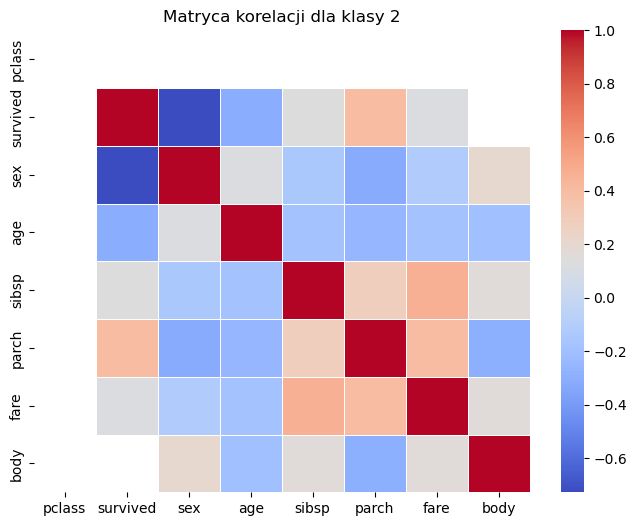

In [14]:
klasa2 = df[(df["pclass"] == 2)].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(klasa2, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matryca korelacji dla klasy 2")
plt.show()

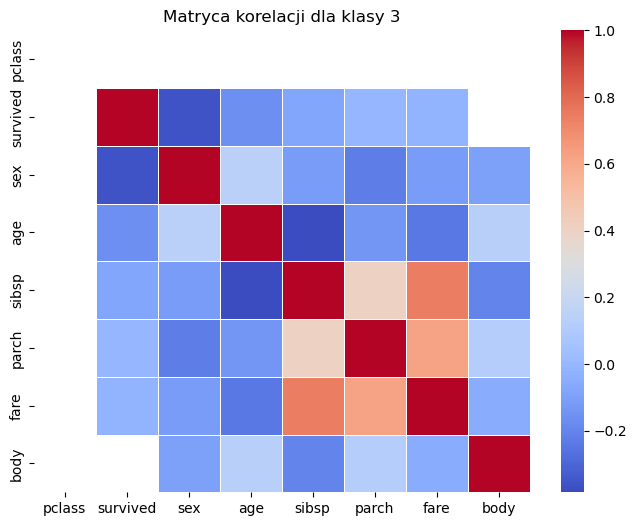

In [12]:
klasa3 = df[(df["pclass"] == 3)].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(klasa3, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matryca korelacji dla klasy 3")
plt.show()

#### W matrycy dla klasy 3 widać największą korelację ceny biletu (dystansem?) z towarzyszami podróży/rodziną/dziećmi. Tylko w klasie 1 i 2 ukazała się korelacja przeżywalności ze współtowarzyszami na statku i z płcią (być może dlatego, że tymi klasami płynęło więcej kobiet i młodszych osób).

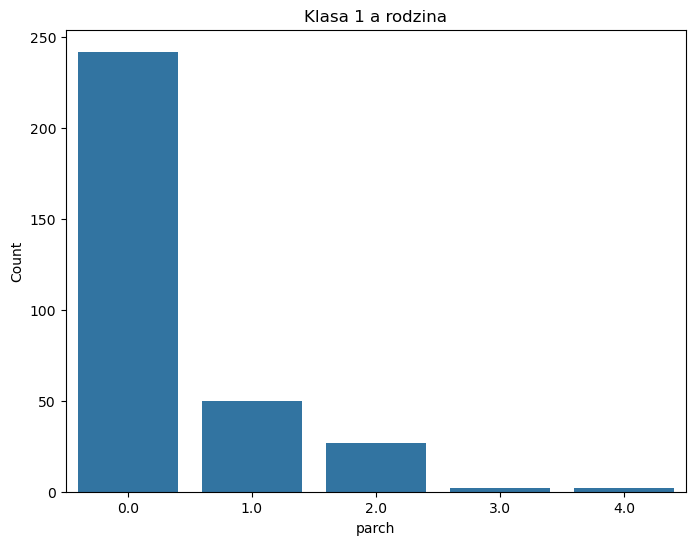

In [30]:
klasa1 = df[(df["pclass"] == 1)]
plt.figure(figsize=(8, 6))
sns.countplot(data=klasa1, x="parch")
plt.title('Klasa 1 a rodzina')
plt.xlabel('parch')
plt.ylabel('Count')
plot_filename = "klasa1_parch.png"
plt.savefig(plot_filename)

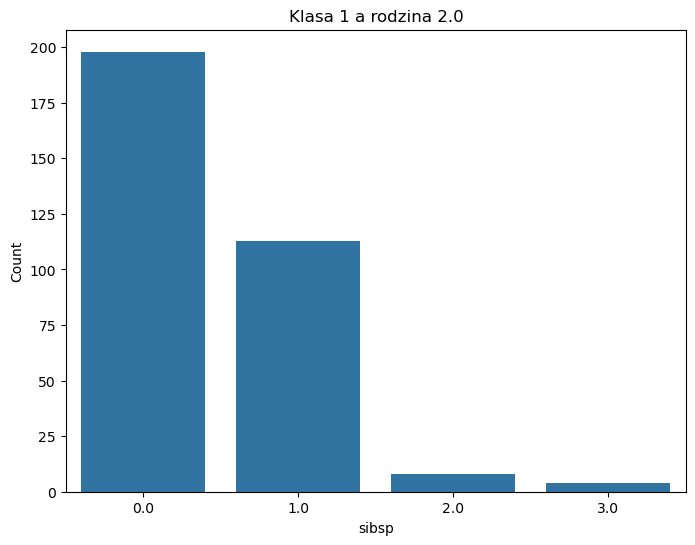

In [31]:
klasa1_sibsp = df[(df["pclass"] == 1)]
plt.figure(figsize=(8, 6))
sns.countplot(data=klasa1_sibsp, x="sibsp")
plt.title('Klasa 1 a rodzina 2.0')
plt.xlabel('sibsp')
plt.ylabel('Count')
plot_filename = "klasa1_sibsp.png"
plt.savefig(plot_filename)

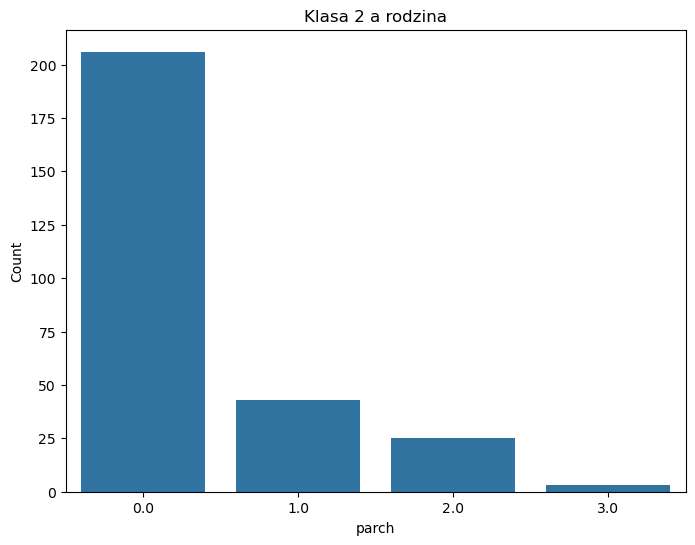

In [29]:
klasa2 = df[(df["pclass"] == 2)]
plt.figure(figsize=(8, 6))
sns.countplot(data=klasa2, x="parch")
plt.title('Klasa 2 a rodzina')
plt.xlabel('parch')
plt.ylabel('Count')
plot_filename = "klasa2_parch.png"
plt.savefig(plot_filename)

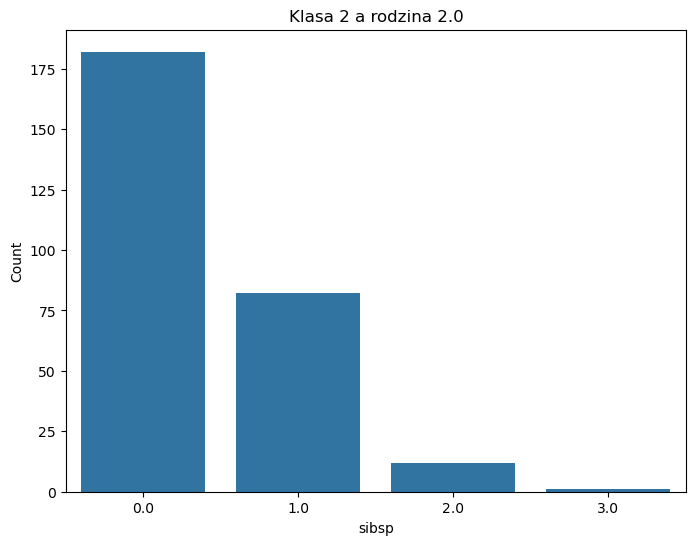

In [33]:
klasa2_sibsp = df[(df["pclass"] == 2)]
plt.figure(figsize=(8, 6))
sns.countplot(data=klasa2_sibsp, x="sibsp")
plt.title('Klasa 2 a rodzina 2.0')
plt.xlabel('sibsp')
plt.ylabel('Count')
plot_filename = "klasa2_sibsp.png"
plt.savefig(plot_filename)

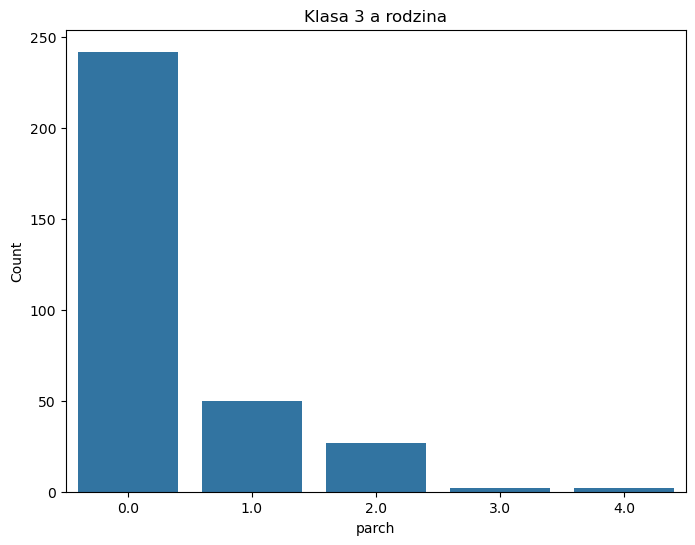

In [28]:
klasa3 = df[(df["pclass"] == 3)]
plt.figure(figsize=(8, 6))
sns.countplot(data=klasa1, x="parch")
plt.title('Klasa 3 a rodzina')
plt.xlabel('parch')
plt.ylabel('Count')
plot_filename = "klasa3_parch.png"
plt.savefig(plot_filename)

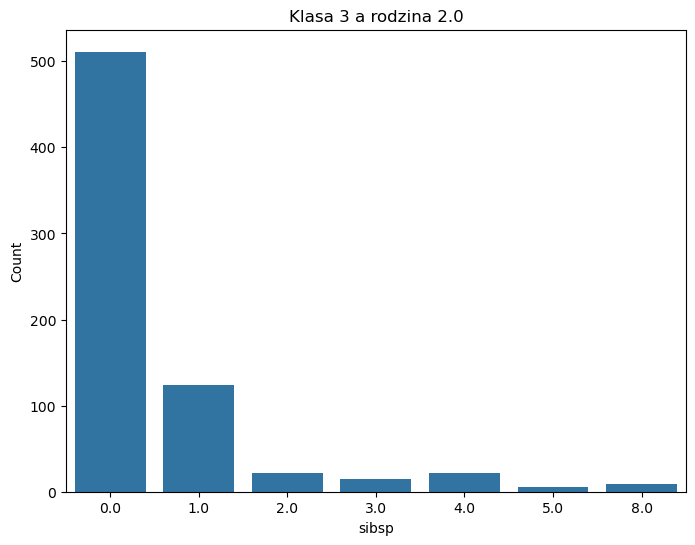

In [34]:
klasa3_sibsp = df[(df["pclass"] == 3)]
plt.figure(figsize=(8, 6))
sns.countplot(data=klasa3_sibsp, x="sibsp")
plt.title('Klasa 3 a rodzina 2.0')
plt.xlabel('sibsp')
plt.ylabel('Count')
plot_filename = "klasa3_sibsp.png"
plt.savefig(plot_filename)

#### W klasie 3 płynęło więcej wielodzietnych rodzin?

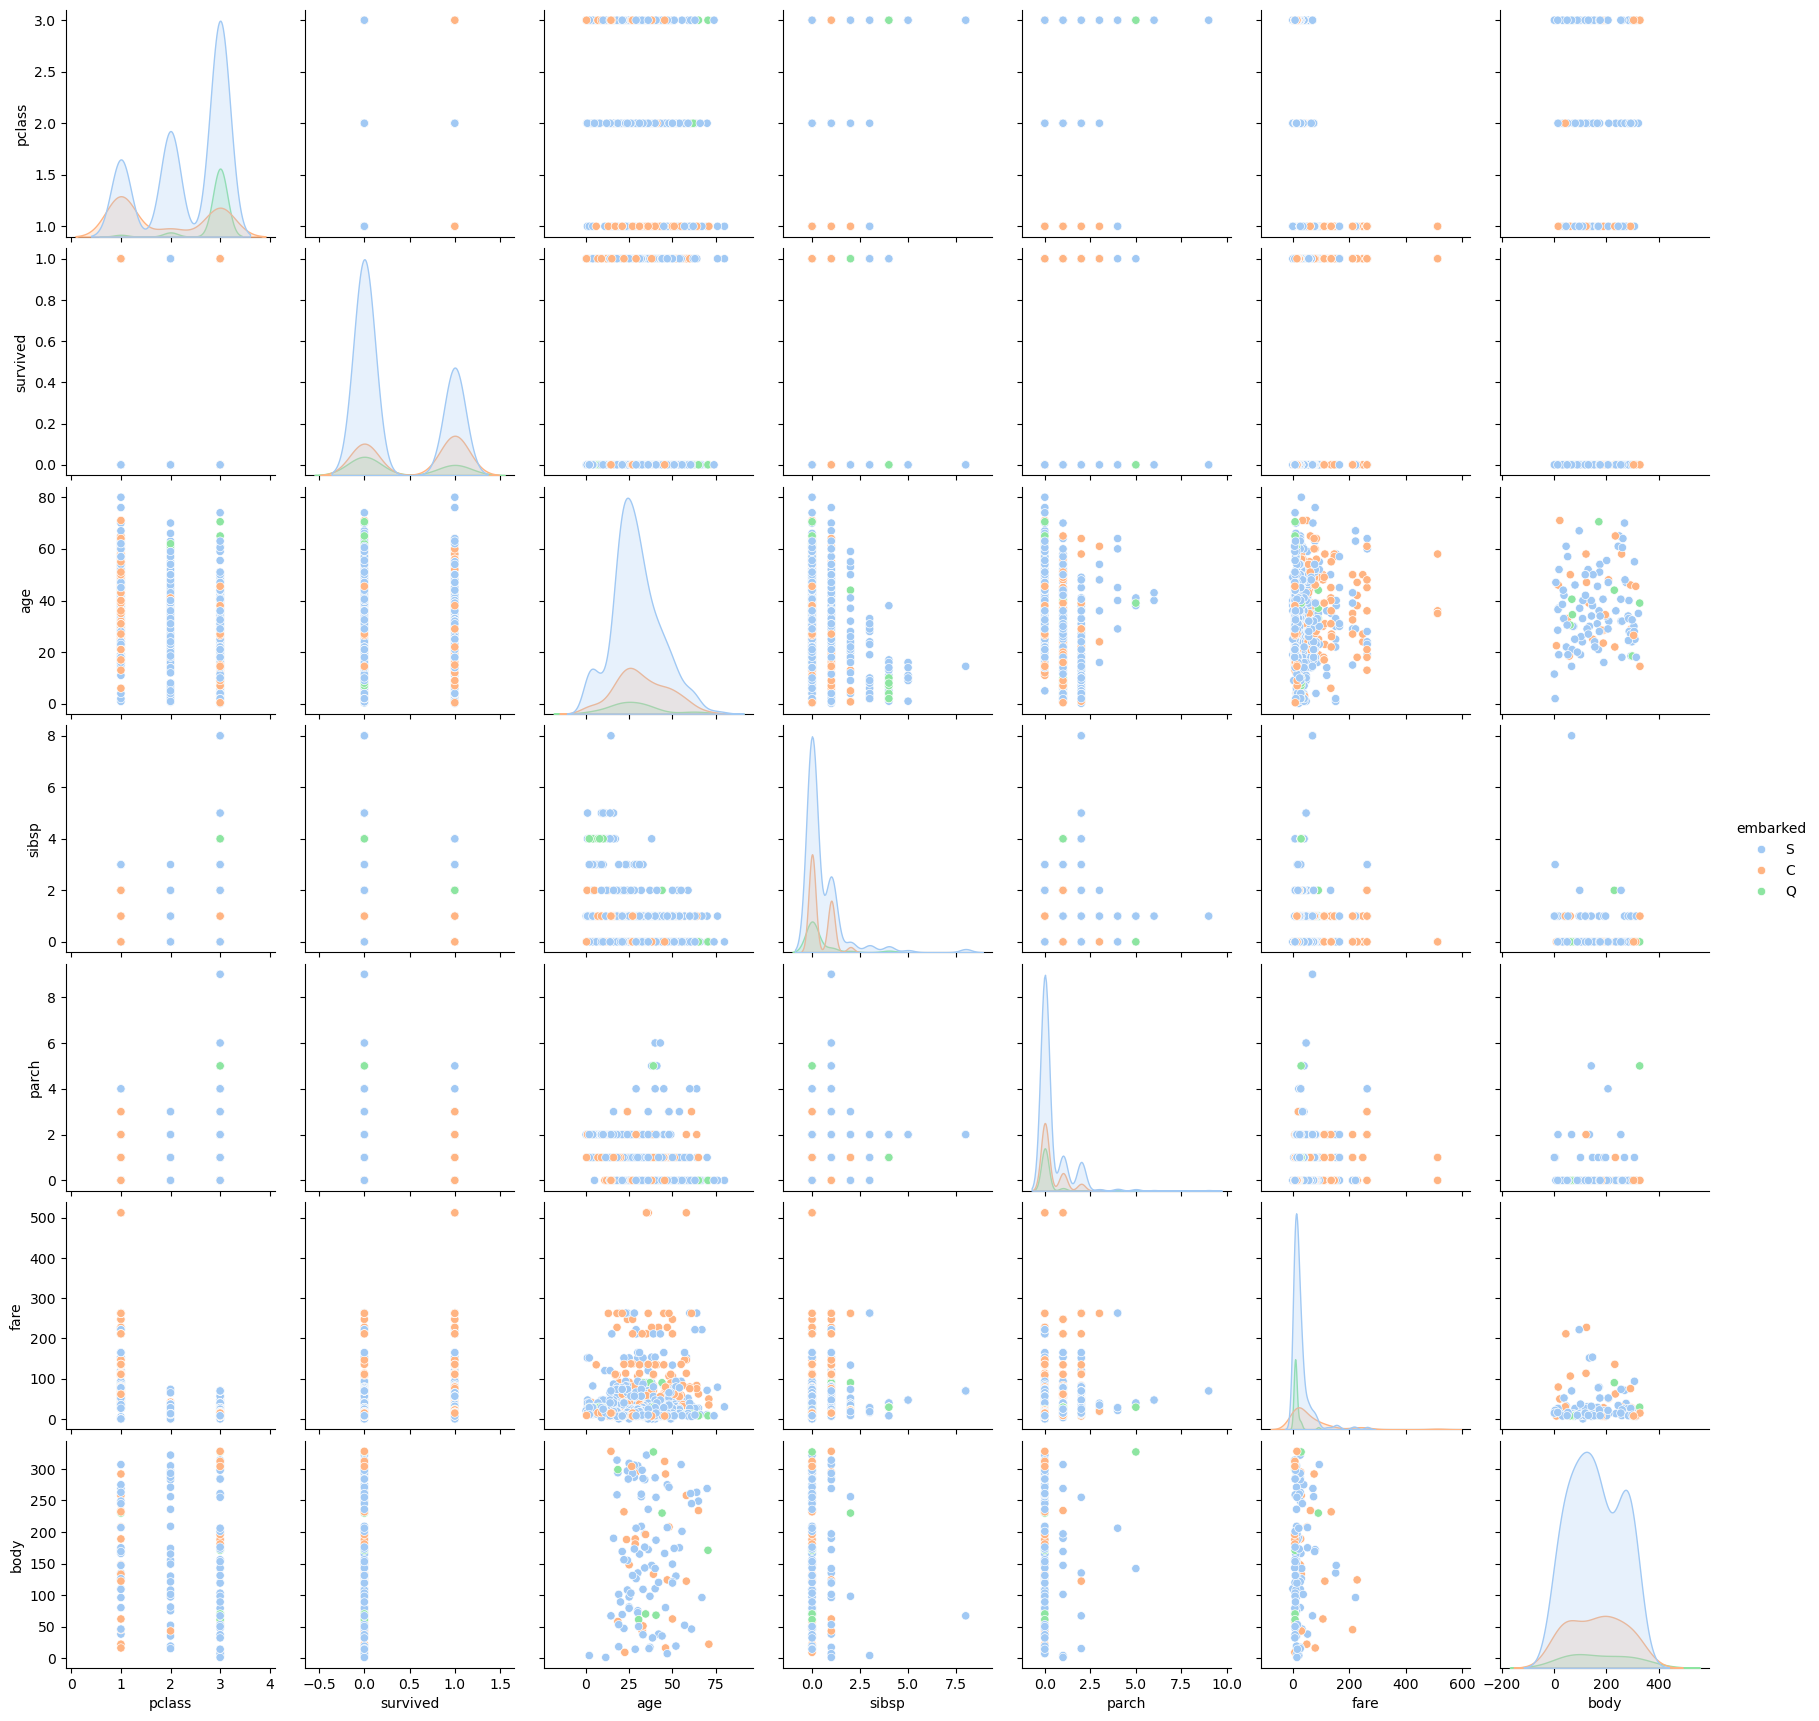

In [38]:
sns.pairplot(df, hue='embarked', palette="pastel")

#### Większość ofiar z portu S, młodsi płynęli z portu C i Q. 

#### Port S i C pokrywają się, nie widać danych dla portu Q.

## Wnioski

#### Na przeżycie miały większe szanse kobiety, osoby płynące w klasie 1 oraz z osobą/osobami towarzyszącymi. Przeżywalność koreluje z rodziną na pokładzie, więc można wnioskować, że ludzie byli ratowani wzraz z rodziną. Kobiety miały większe szanse na przeżycie, nawet jeśli płynęły samotnie. Mężczyźni mieli większe szanse na przeżycie, jeśli byli starsi. Przeciętna ofiara to mężczyzna w wieku 21 lat, który płynął w klasie 3. Nie udało się przeżyć samotnym kobietom, jeśli płynęły szczególnie w klasie 3 oraz gdy miały poniżej 30 lat. Dwójka niemowkaków z 12 zginęła. Najstarszemu pasażerowi udało się przeżyć. Większość pasażerów weszła na statek portem Southampton. W klasie 3 najprawdopodobniej płynęły rodziny wielodzietne, bo w tej klasie występuje największa liczba rodzeństwa na pokładzie. W klasie 2 i 3 max. 4 osoby towarzyszące.


In [2]:
!jupyter nbconvert --to html "EDA_titanic_PJ.ipynb"

[NbConvertApp] Converting notebook EDA_titanic_PJ.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 39 image(s).
[NbConvertApp] Writing 6769400 bytes to EDA_titanic_PJ.html
